# Lab session 2: Wavelet transform and image processing
---
## Representation of signals & inverse problems - G1-G2
---

This lab explores some aspects of orthogonal wavelet transform in 2D for image processing, with applications to denoising and filtering. All the numerical illustrations covered in this session rely on the Python module `Pywavelets`.

Each wavelet is determined by its low-pass filter or scaling function (in french _fonction d'échelle_). The longer this filter is (*i.e.*, the more coefficients it contains), the larger the number of null moments. For instance, Daubechies wavelets are composed of $p=2k$ coefficients, for $k$ null moments.

A larger number of null moments allows regular signals/images to be better compressed. However, an extended support of the wavelet can be problematic to represent highly irregular regions of the signal, such as discontinuities.

The choice of a wavelet is a matter of compromise, depending on the type of structures expected to be observed in the image of interest.

## Before you start...
Carefully read the instructions below before starting the lab.

* Place the `.zip` archive in a local folder (Computer -> Documents\TDS\).
* Unzip the `.zip` archive.
* Rename the folder as `TP2_Name1_Name2`.
* Duplicate the provided notebook file, and rename it `TP2_Name1_Name2.ipynb`.
* If needed, an excellent tutorial on the use of Python for scientific computing can be found in the [Scipy lecture notes](https://scipy-lectures.org/).

**PyWavelets** is an open source wavelet transform package for Python. It combines a simple high level interface with low level C and Cython performance. 

It is very easy to use and get started with. If the package is not already installed, open the Python interactive anaconda prompt and type:
```
conda install pywavelets
```

Further details available at: https://pywavelets.readthedocs.io/en/latest/ref/index.html

## Configuration

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import matplotlib.image as mpimg

from scipy.signal import *
from scipy.stats import *
from scipy.io.wavfile import *
from scipy.io import *
from numpy.fft import *
from matplotlib.colors import LogNorm # for Log normalization

# to install sounddevice library: type the following code in Anacoda prompt window : pip install sounddevice
import sounddevice as sd

from module_TDS import *
from plotwavelet import *

## Contents <a id="content"></a>

1. [1D discrete wavelet transform](#section1)
   - [Exercise 1](#ex1)
2. [2D discrete wavelet transform](#section2)
   - [Exercise 2](#ex2) 
3. [Wavelet filtering](#section3)
   - [Exercise 3](#ex3) 
4. [Wavelet denoising](#section4)
   - [Exercise 4](#ex4) 
   - [Exercise 5](#ex5) (optional)

---
## 1D discrete wavelet transform <a id="section1"></a> [[back to top]](#content)
The Discrete Wavelet Transform (DWT) of a signal can be computed with the `pywt.DWT` and `pywt.wavedec` functions (see the example below). The result is stored in a dictionary of arrays containing each octave separately, as well as the approximation level. 

An example of application to a chirp signal is reported below, illustrating the multiresolution analysis of a wideband signal.

In [64]:
N = 2**13
Fs = 1024   # 2**10
t = np.arange(0,N,1)/Fs
x = chirp(t, f0=60, f1=2, t1=10, method='hyperbolic')

sd.play(x,Fs*44)  # artificial change of Fs for listening

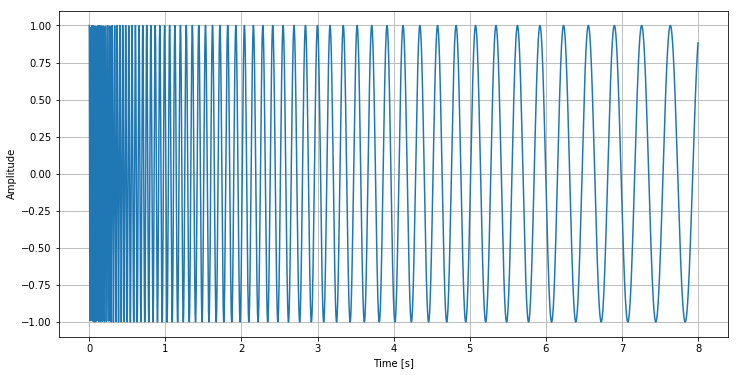

In [65]:
figure(figsize=(12,6))
plot(t, x)
xlabel('Time [s]')
# xlim( 0, 1 )
ylabel(r'Amplitude')
grid()
show()

Different wavelets are available. Use the `pywt.wavelist()` command to display the list of the available built-in wavelets.

In [66]:
pywt.wavelist()

['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8',
 'cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'coif1',
 'coif2',
 'coif3',
 'coif4',
 'coif5',
 'coif6',
 'coif7',
 'coif8',
 'coif9',
 'coif10',
 'coif11',
 'coif12',
 'coif13',
 'coif14',
 'coif15',
 'coif16',
 'coif17',
 'db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38',
 'dmey',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'haar',
 'mexh',
 'morl',
 'rbio1.1',
 'rbio1.3',
 'rbio1.5',
 'rbio2.2',
 'rbio2.4',
 'rbio2.6',
 'rbio2.8',
 'rbio3.1',

#### Computing your first orthogonal wavelet transform
The function `pywt.DWT` computes a single level wavelet decomposition, returning the resulting approximation coefficients and details.

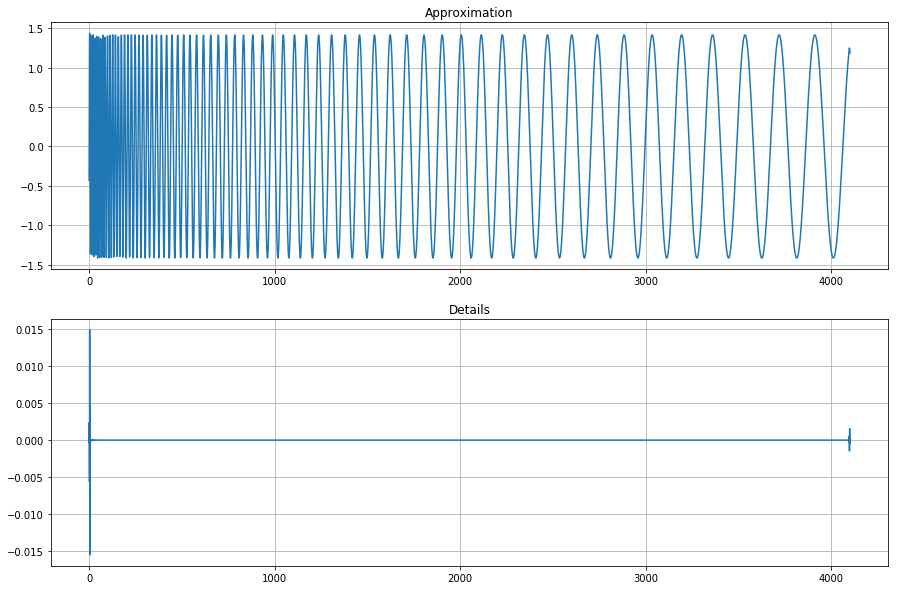

In [67]:
cA, cD = pywt.dwt(x, 'sym8')

figure(figsize=(15,10))
subplot(211)
plot(cA)
title('Approximation')
grid()
subplot(212)
plot(cD)
title('Details')
grid()
show()

The `pywt.wavedec` function computes a multi-level wavelet transform. It returns an ordered list of coefficients arrays, where $n$ denotes the level of decomposition. Wavelet coefficients are stored in only 1 object `coeff`. The first element `coeff[0]` is an array containing approximation coefficients. The following elements `coeff[i]` are arrays containing the details coefficients at the different scales.

In [68]:
coeff = pywt.wavedec(x, 'sym8', level = 7)

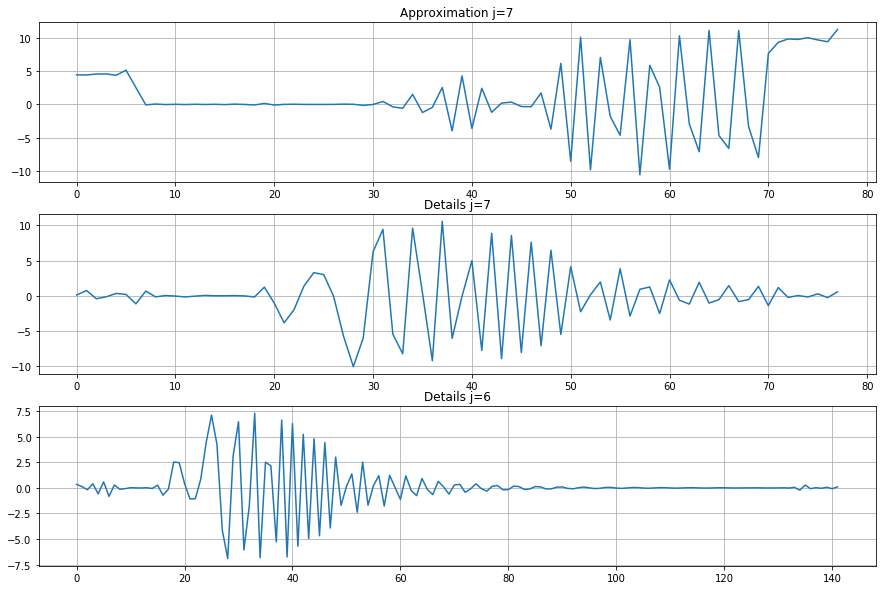

In [69]:
figure(figsize=(15,10))
subplot(311)
plot(coeff[0])
title('Approximation j=7')
grid()
subplot(312)
plot(coeff[1])
title('Details j=7')
grid()
subplot(313)
plot(coeff[2])
title('Details j=6')
grid()
show()

### Exercise 1 <a id="ex1"></a> [[back to top](#content)]
1. Read the documentation of the functions `pywt.dwt`, `pywt.idwt` and `pywt.wavedec`. What are these functions used for, and what is the difference between these?
2. One can filter out the smallest scales by putting the associated wavelet coefficients in the decomposition to zero. Illustrate the effect of nulling some coefficients of the details (or the approximation) for a given set of octaves.
_Indication: to do this, you need to compute the wavelet transform, set some coefficients to zero and then reconstruct the signal by using the inverse wavelet transform._
3. Try this filtering operation with several wavelets of your choice and compare the results. Observe and comment.
4. Use at least one other 1D signal using `pywt.data`, and repeat the operations described in 2. and 3.

1. The function "pywt.dwt" is used to compute a single level Discrete Wavelet Transform. It returns an approximation and detail coefficients. 
The function "pywt.idwt" computes a single level Inverse Discrete Wavelet Transform. It returns a single level reconstruction of signal from given coefficients.
Finally, the function "pywt.wavedec" computes a multilevel 1D Discrete Wavelet Transform of data. It returns an ordered list of coefficients arrays. The first element of the result is approximation coefficients array and the following elements are details coefficients arrays.
2. By nulling some coefficients of the details, we don't observe any major modification of the original signal, whereas, by nulling some coefficients of the approximation, we lose some information and the signal computed with the inverse wavelet transform does not match the original signal.
3. With the Bior wavelet, we notice that many detail coefficients are not null, but otherwise, we don't observe any major differences between different types of wavelets or between the inverse transforms when we use these wavelets.
4. The observation is almost the same than the previous signal, but we notice a small difference at the peak around 500 between the wavelet 'sym8' and the wavelet 'db19'. For the latter, the peak is displaced slightly to the right, but there is no difference to the reconstruction of the signal.


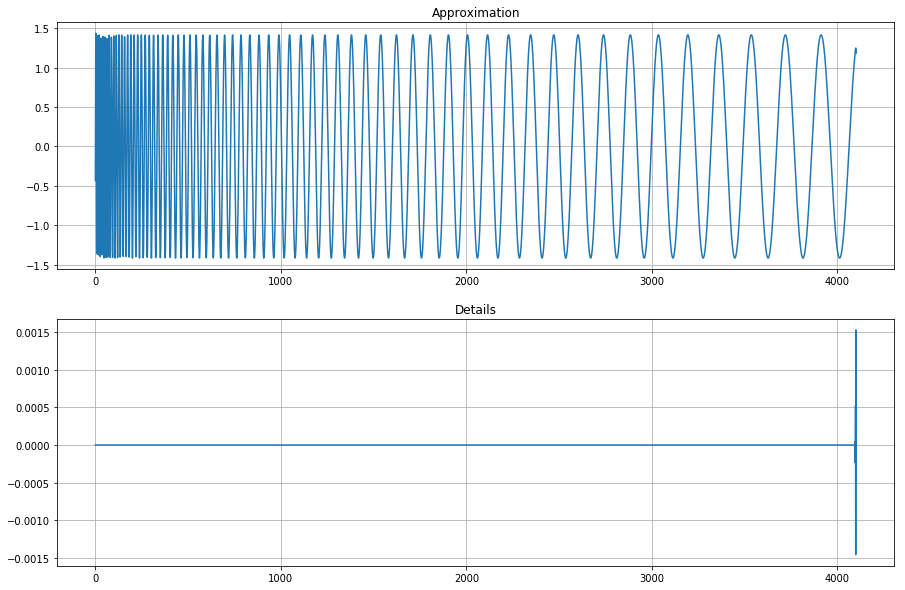

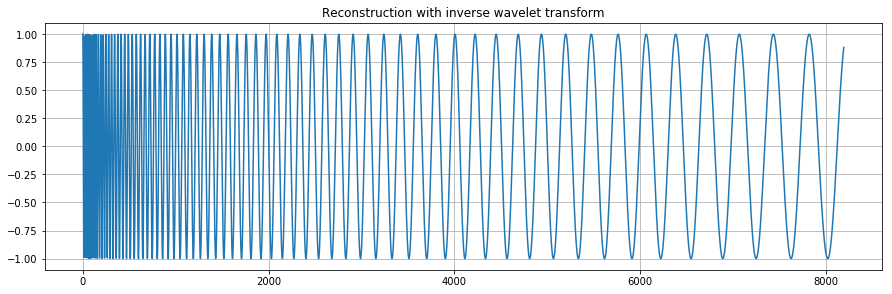

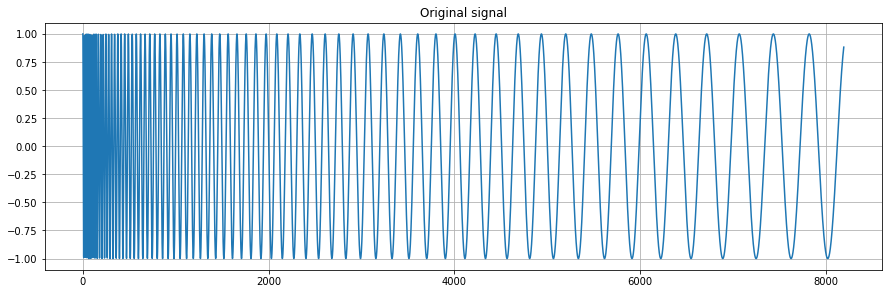

In [70]:
cA, cD = pywt.dwt(x, 'sym8')
cD[0:500]=0
figure(figsize=(15,10))
subplot(211)
plot(cA)
title('Approximation')
grid()
subplot(212)
plot(cD)
title('Details')
grid()
show()

X=pywt.idwt(cA, cD, 'sym8', mode='symmetric', axis=-1)
figure(figsize=(15,10))
subplot(212)
plot(X)
title('Reconstruction with inverse wavelet transform')
grid()
show()

figure(figsize=(15,10))
subplot(212)
plot(x)
title('Original signal')
grid()
show()

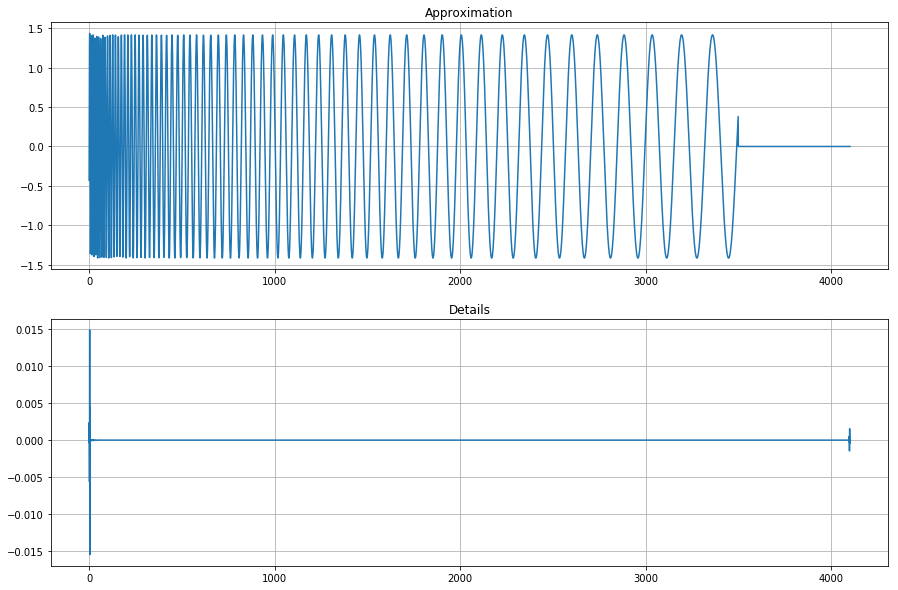

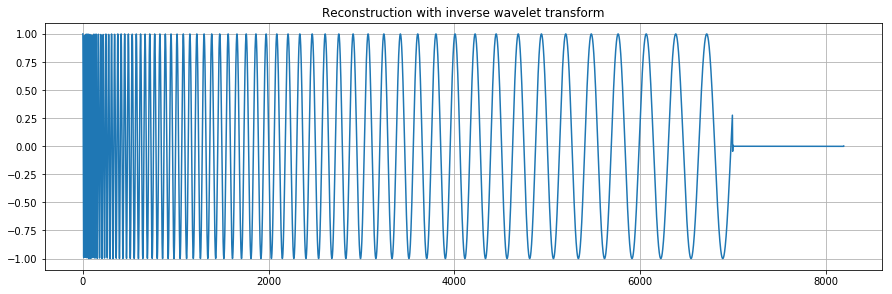

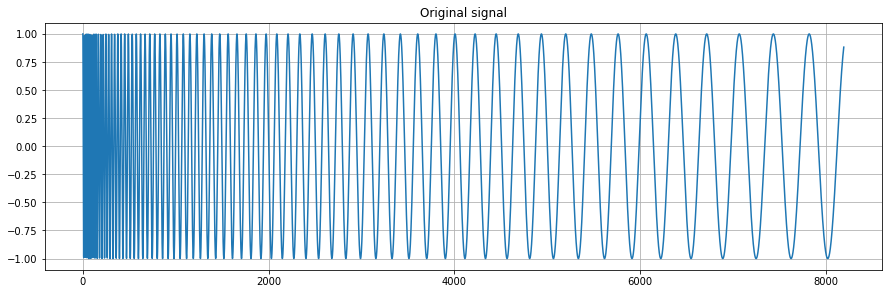

In [71]:
cA, cD = pywt.dwt(x, 'sym8')
cA[3500:]=0
figure(figsize=(15,10))
subplot(211)
plot(cA)
title('Approximation')
grid()
subplot(212)
plot(cD)
title('Details')
grid()
show()

X=pywt.idwt(cA, cD, 'sym8', mode='symmetric', axis=-1)
figure(figsize=(15,10))
subplot(212)
plot(X)
title('Reconstruction with inverse wavelet transform')
grid()
show()

figure(figsize=(15,10))
subplot(212)
plot(x)
title('Original signal')
grid()
show()

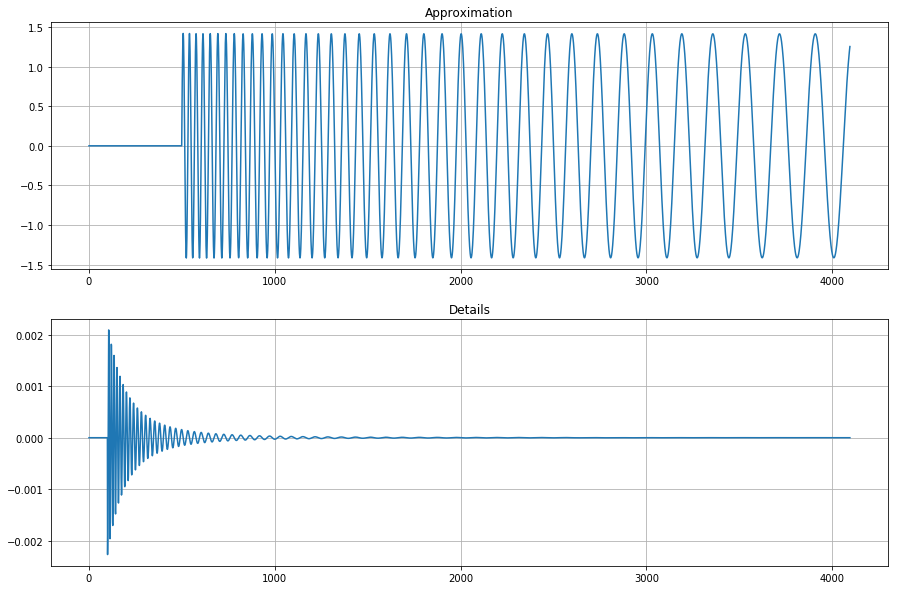

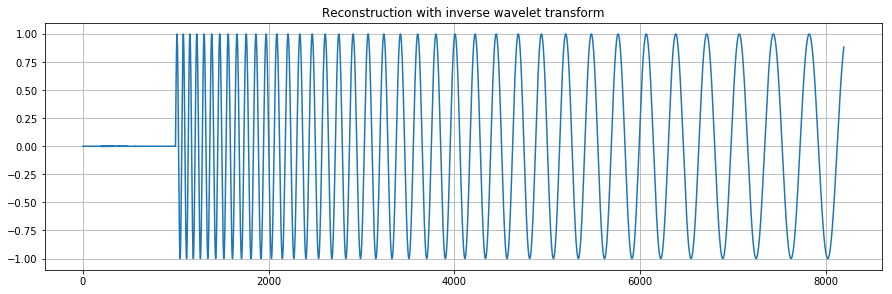

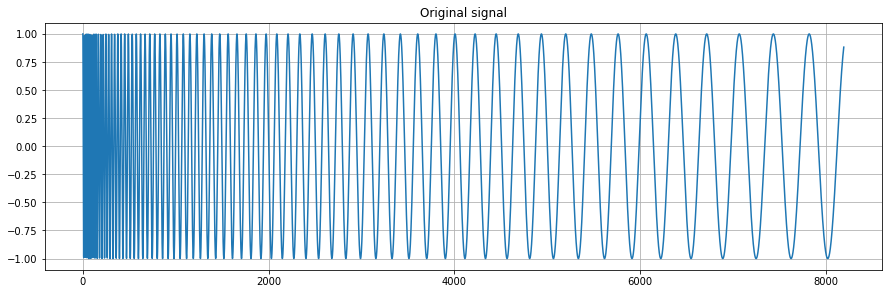

In [72]:
cA, cD = pywt.dwt(x, 'bior3.1')
cA[0:500]=0
cD[0:100]=0
figure(figsize=(15,10))
subplot(211)
plot(cA)
title('Approximation')
grid()
subplot(212)
plot(cD)
title('Details')
grid()
show()

X=pywt.idwt(cA, cD, 'bior3.1', mode='symmetric', axis=-1)
figure(figsize=(15,10))
subplot(212)
plot(X)
title('Reconstruction with inverse wavelet transform')
grid()
show()

figure(figsize=(15,10))
subplot(212)
plot(x)
title('Original signal')
grid()
show()

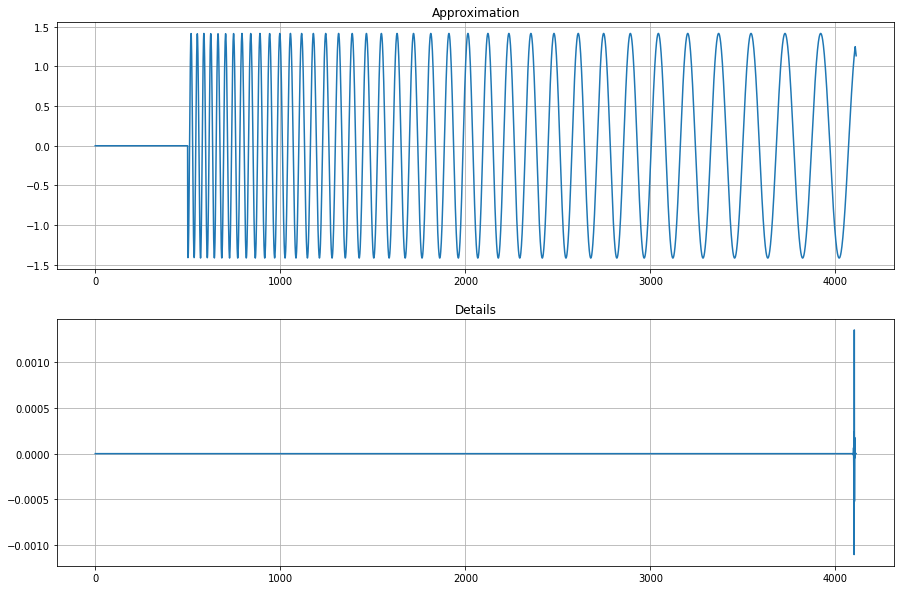

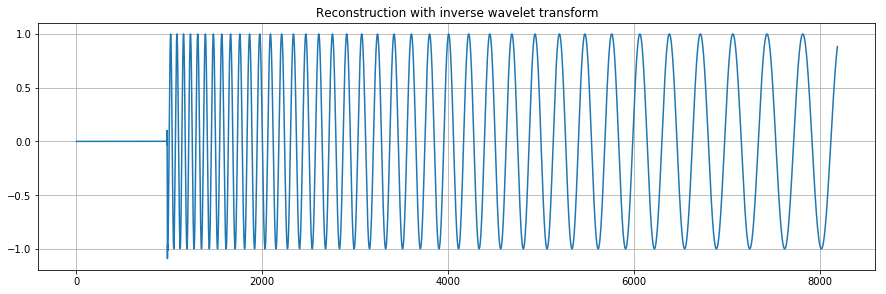

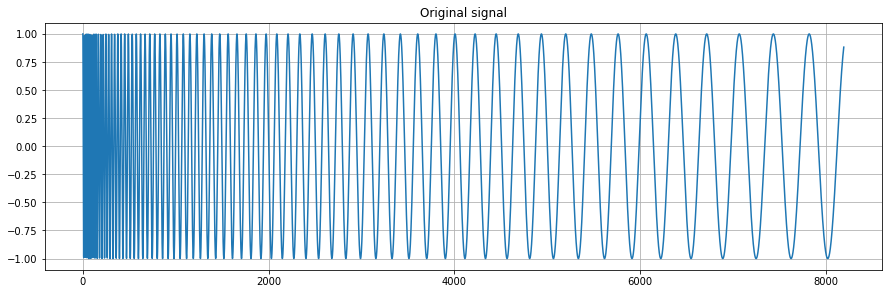

In [73]:
cA, cD = pywt.dwt(x, 'coif6')
cA[0:500]=0
cD[0:100]=0
figure(figsize=(15,10))
subplot(211)
plot(cA)
title('Approximation')
grid()
subplot(212)
plot(cD)
title('Details')
grid()
show()

X=pywt.idwt(cA, cD, 'coif6', mode='symmetric', axis=-1)
figure(figsize=(15,10))
subplot(212)
plot(X)
title('Reconstruction with inverse wavelet transform')
grid()
show()

figure(figsize=(15,10))
subplot(212)
plot(x)
title('Original signal')
grid()
show()

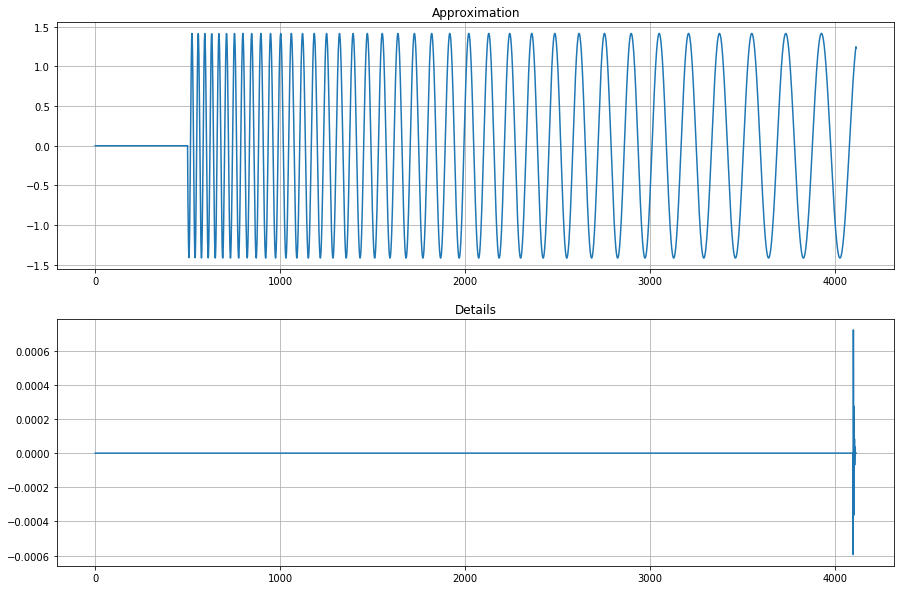

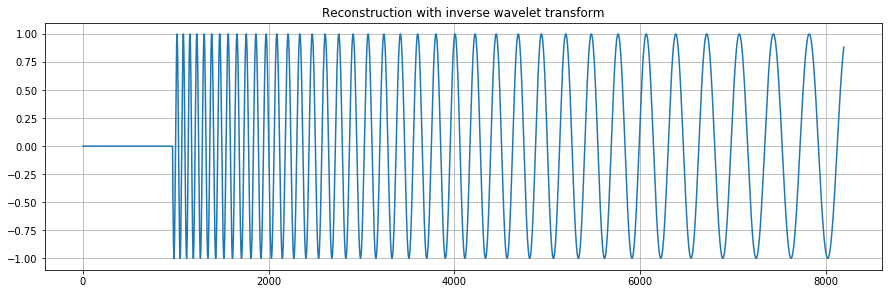

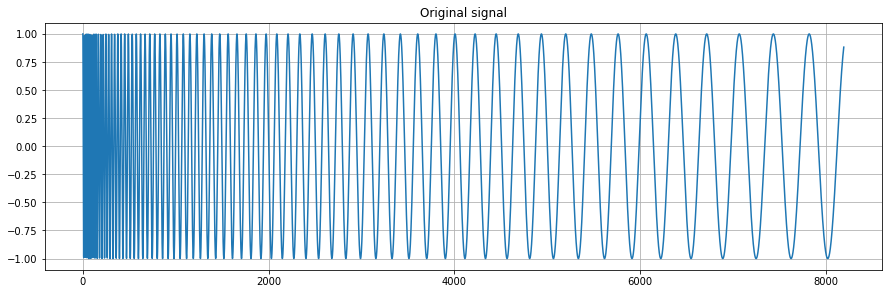

In [74]:
cA, cD = pywt.dwt(x, 'db19')
cA[0:500]=0
cD[0:100]=0
figure(figsize=(15,10))
subplot(211)
plot(cA)
title('Approximation')
grid()
subplot(212)
plot(cD)
title('Details')
grid()
show()

X=pywt.idwt(cA, cD, 'db19', mode='symmetric', axis=-1)
figure(figsize=(15,10))
subplot(212)
plot(X)
title('Reconstruction with inverse wavelet transform')
grid()
show()

figure(figsize=(15,10))
subplot(212)
plot(x)
title('Original signal')
grid()
show()

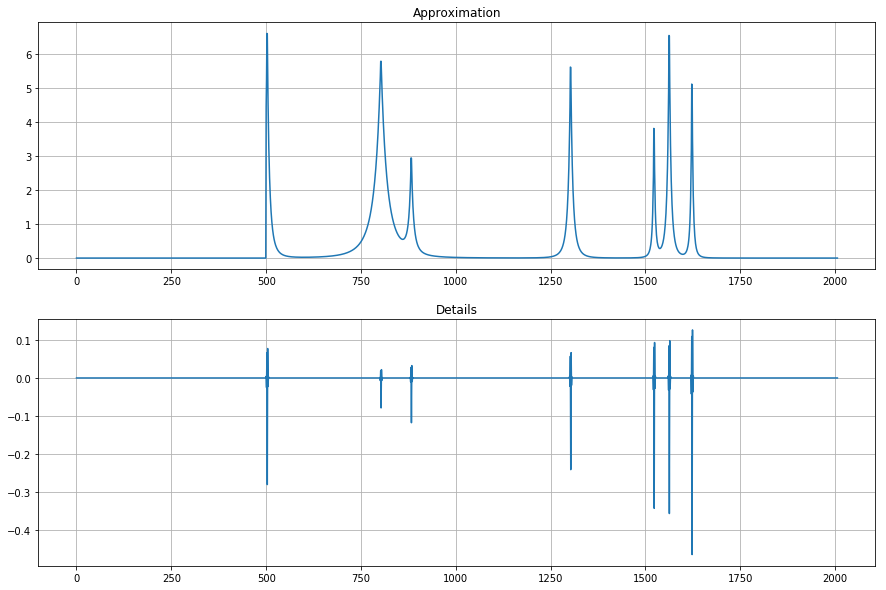

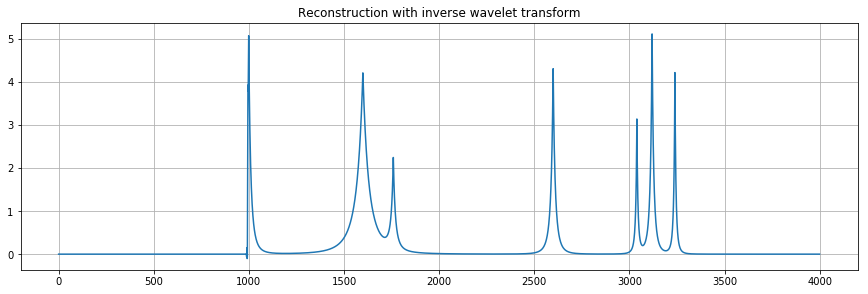

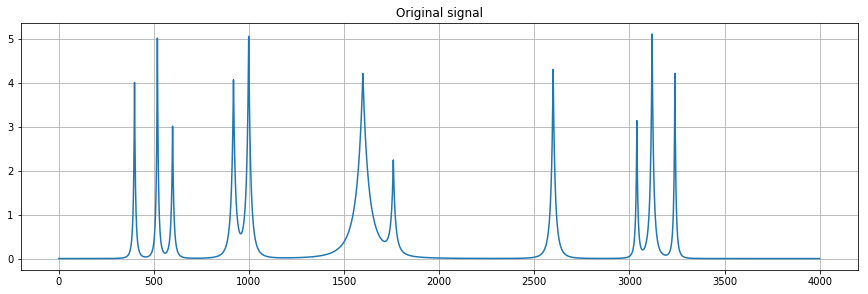

In [75]:
y = pywt.data.demo_signal(name='Bumps', n=4000)
cA, cD = pywt.dwt(y, 'sym8')
cA[0:500]=0
cD[0:500]=0
figure(figsize=(15,10))
subplot(211)
plot(cA)
title('Approximation')
grid()
subplot(212)
plot(cD)
title('Details')
grid()
show()

Y=pywt.idwt(cA, cD, 'sym8', mode='symmetric', axis=-1)
figure(figsize=(15,10))
subplot(212)
plot(Y)
title('Reconstruction with inverse wavelet transform')
grid()
show()

figure(figsize=(15,10))
subplot(212)
plot(y)
title('Original signal')
grid()
show()

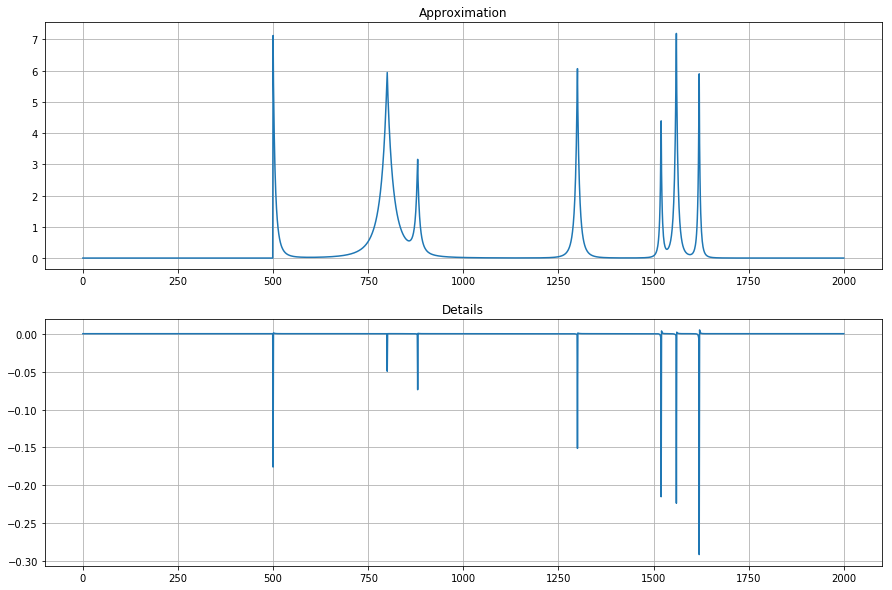

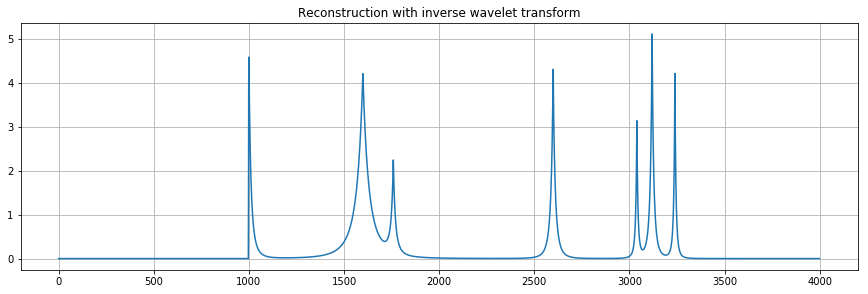

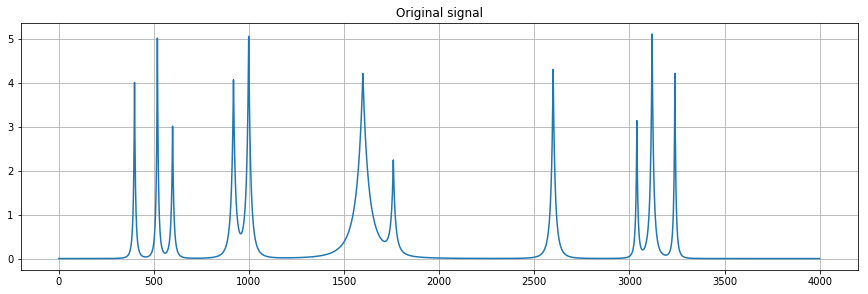

In [76]:
y = pywt.data.demo_signal(name='Bumps', n=4000)
cA, cD = pywt.dwt(y, 'bior3.1')
cA[0:500]=0
cD[0:500]=0
figure(figsize=(15,10))
subplot(211)
plot(cA)
title('Approximation')
grid()
subplot(212)
plot(cD)
title('Details')
grid()
show()

Y=pywt.idwt(cA, cD, 'bior3.1', mode='symmetric', axis=-1)
figure(figsize=(15,10))
subplot(212)
plot(Y)
title('Reconstruction with inverse wavelet transform')
grid()
show()

figure(figsize=(15,10))
subplot(212)
plot(y)
title('Original signal')
grid()
show()

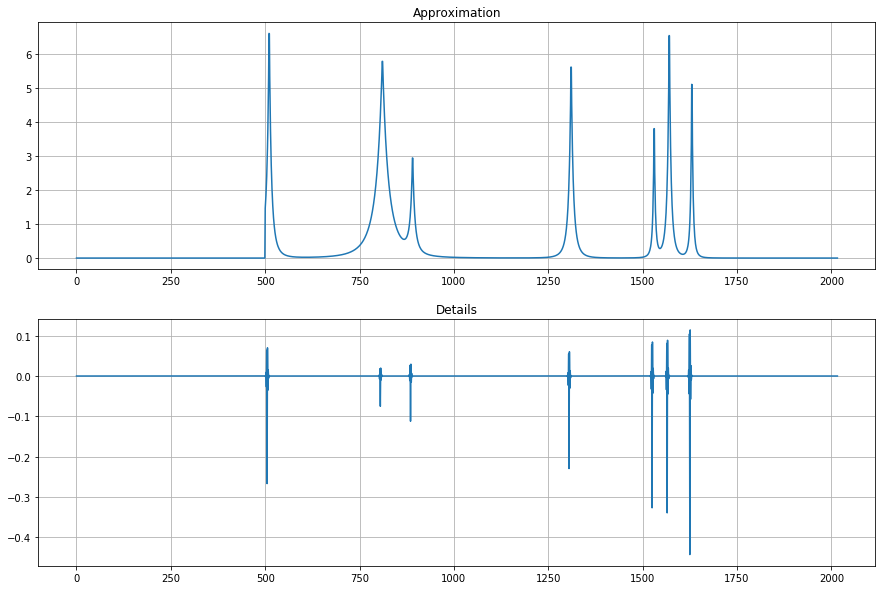

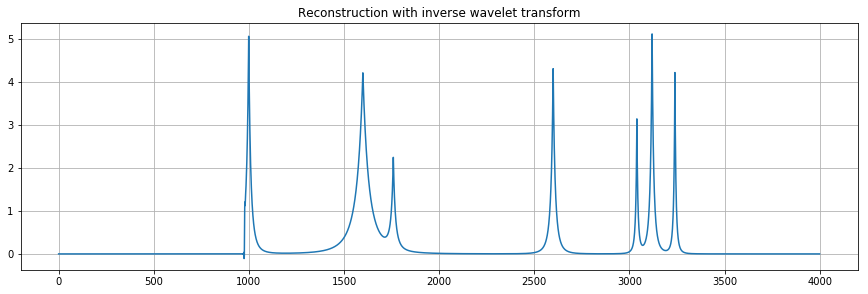

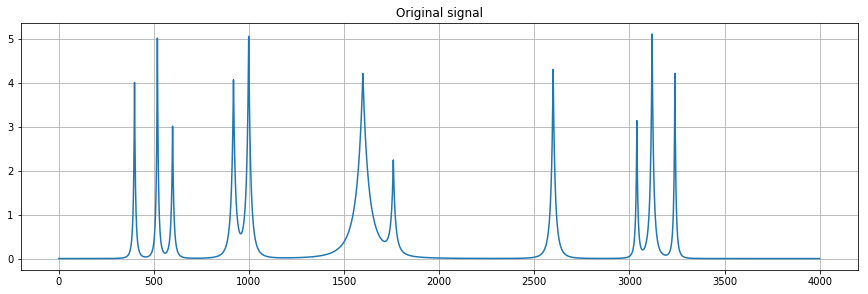

In [77]:
y = pywt.data.demo_signal(name='Bumps', n=4000)
cA, cD = pywt.dwt(y, 'coif6')
cA[0:500]=0
cD[0:500]=0
figure(figsize=(15,10))
subplot(211)
plot(cA)
title('Approximation')
grid()
subplot(212)
plot(cD)
title('Details')
grid()
show()

Y=pywt.idwt(cA, cD, 'coif6', mode='symmetric', axis=-1)
figure(figsize=(15,10))
subplot(212)
plot(Y)
title('Reconstruction with inverse wavelet transform')
grid()
show()

figure(figsize=(15,10))
subplot(212)
plot(y)
title('Original signal')
grid()
show()

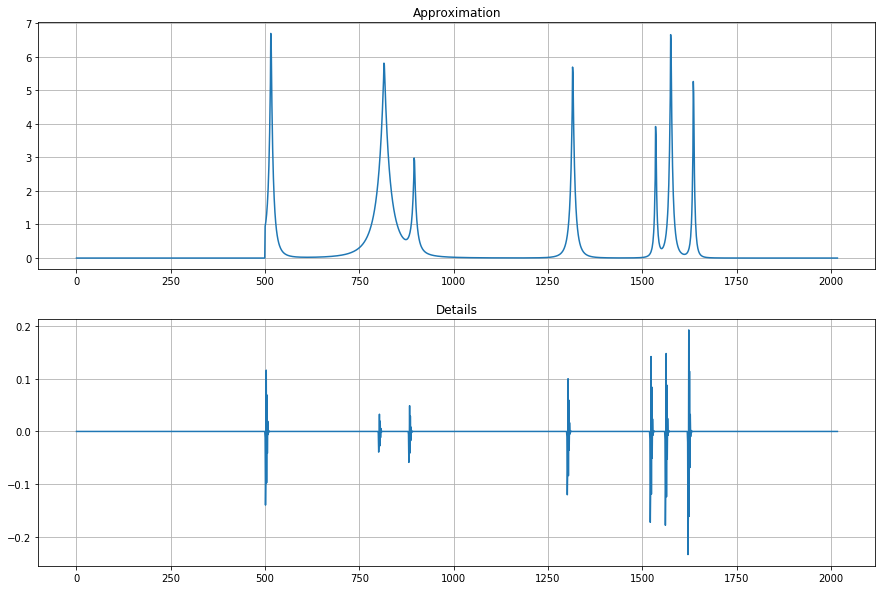

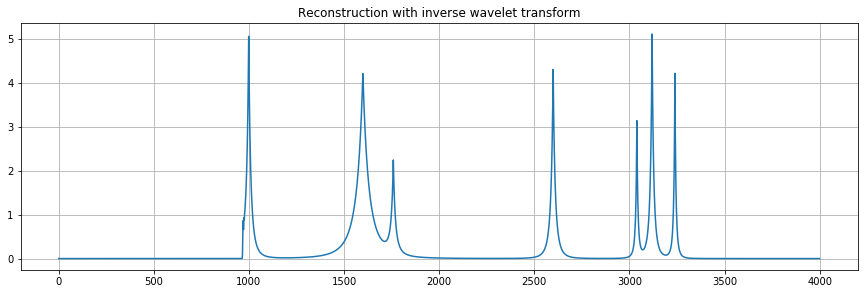

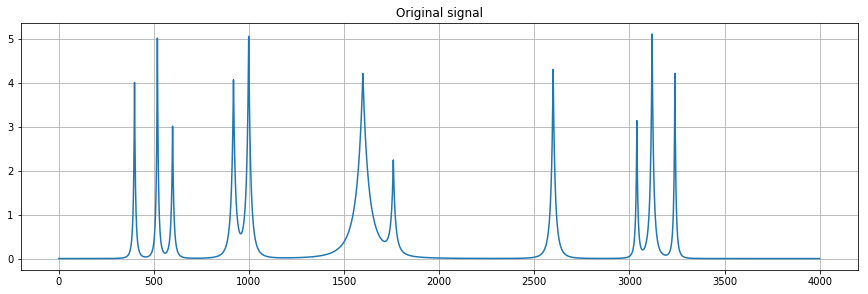

In [78]:
y = pywt.data.demo_signal(name='Bumps', n=4000)
cA, cD = pywt.dwt(y, 'db19')
cA[0:500]=0
cD[0:500]=0
figure(figsize=(15,10))
subplot(211)
plot(cA)
title('Approximation')
grid()
subplot(212)
plot(cD)
title('Details')
grid()
show()

Y=pywt.idwt(cA, cD, 'db19', mode='symmetric', axis=-1)
figure(figsize=(15,10))
subplot(212)
plot(Y)
title('Reconstruction with inverse wavelet transform')
grid()
show()

figure(figsize=(15,10))
subplot(212)
plot(y)
title('Original signal')
grid()
show()

---
## 2D discrete wavelet transform <a id="section2"></a> [[back to top](#content)]
We now turn to the computation of a 2D wavelet transform to analyze images (example images are available in the folder `img\`). Let us start with a simple chessboard image.

_Indication: you can consider other images, in particular using `pywt.data`._

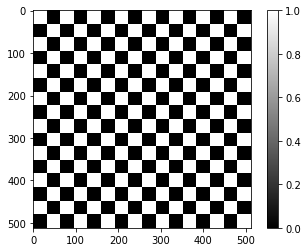

In [79]:
filename='img/chessboard.png'

I=mpimg.imread(filename) 

plt.figure()
plt.imshow(I, cmap='gray')
plt.colorbar()
plt.show()

#### Wavelet transform
Let us compute a first 2D wavelet transform using the function `pywt.wavedec2` and observe the result.

In [80]:
# Wavelet decomposition
Jmax = int(np.log2(I.shape[0]))  # maximal number of octaves
J = 2  

wtcoeffs = pywt.wavedec2(I, wavelet='sym8', level=J, mode ='periodization')

Since the coefficients are stored in a dictionary of objects, we need to translate these in an array object for graphical representation using the `plot_wavelet` function:

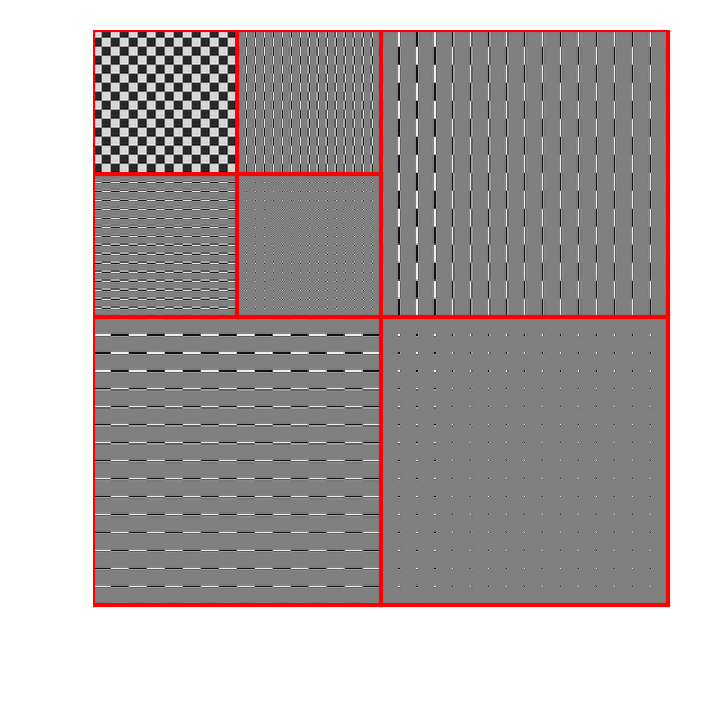

In [81]:
# Casting coeff in a single array
wtcoeffs_arr, coeff_slices = pywt.coeffs_to_array(wtcoeffs)

# Graphical representation
plt.figure(figsize=(4, 4), dpi=200)
plot_wavelet(wtcoeffs_arr, Jmin=Jmax-J);

## Exercise 2 <a id="ex2"></a> [[back to top](#content)]
1. Observe the figure above and briefly recall its structure and what it represents.
2. Play with the parameter $J$ (or `level`). What does it correspond to?
3. Observe the wavelet transform of other images.
4. For this image, try the Haar wavelet and compare the result with any other wavelet transform. What do you notice? Do you have an explanation?

1. The figure represents, in the top left hand corner, the approximation of the signal. To the right of the approximation, we have the vertical details at the lowest of 2 levels of precision. Under the approximation, we have the horizontal details at the lowest of 2 levels of precision. Finally, to the right of the horizontal details, we have the diagonal details at the same level of precision. Then, on the top right, the bottom left and the bottom right corners, we have the vertical, horizontal, diagonal details at the highest level of precision, respectively.
2. J correspond to the number of levels of precision of the transform.

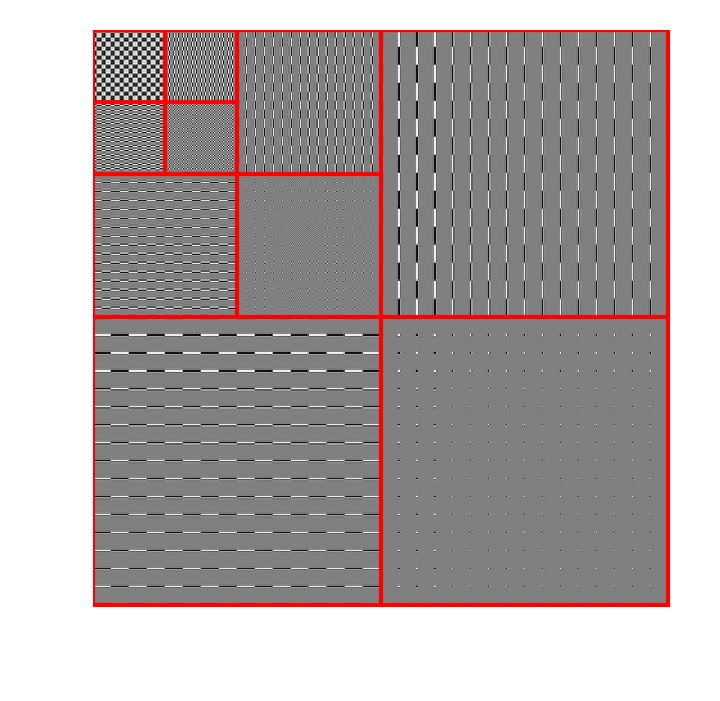

In [82]:
# Wavelet decomposition
Jmax = int(np.log2(I.shape[0]))  # maximal number of octaves
J = 3 

wtcoeffs = pywt.wavedec2(I, wavelet='sym8', level=J, mode ='periodization')
# Casting coeff in a single array
wtcoeffs_arr, coeff_slices = pywt.coeffs_to_array(wtcoeffs)

# Graphical representation
plt.figure(figsize=(4, 4), dpi=200)
plot_wavelet(wtcoeffs_arr, Jmin=Jmax-J);

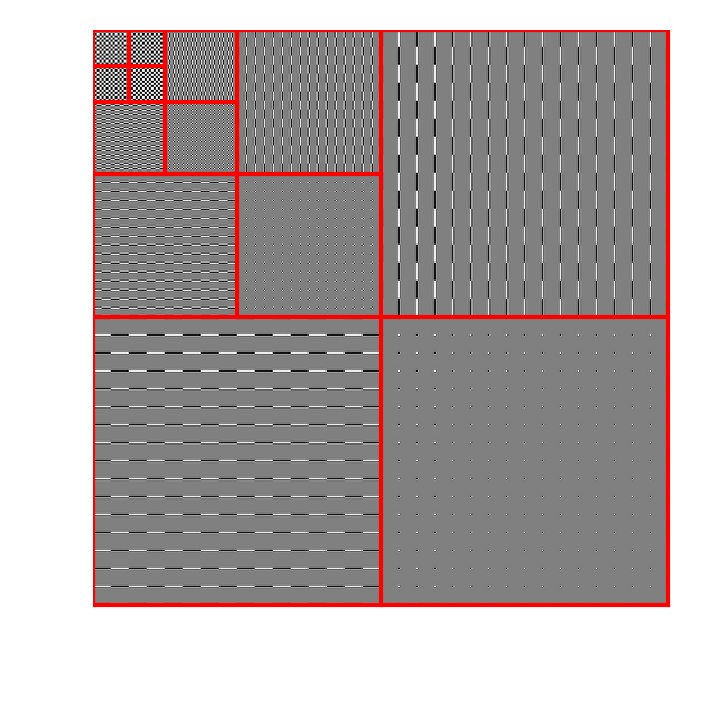

In [83]:
# Wavelet decomposition
Jmax = int(np.log2(I.shape[0]))  # maximal number of octaves
J = 4 

wtcoeffs = pywt.wavedec2(I, wavelet='sym8', level=J, mode ='periodization')
# Casting coeff in a single array
wtcoeffs_arr, coeff_slices = pywt.coeffs_to_array(wtcoeffs)

# Graphical representation
plt.figure(figsize=(4, 4), dpi=200)
plot_wavelet(wtcoeffs_arr, Jmin=Jmax-J);

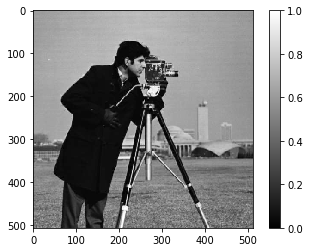

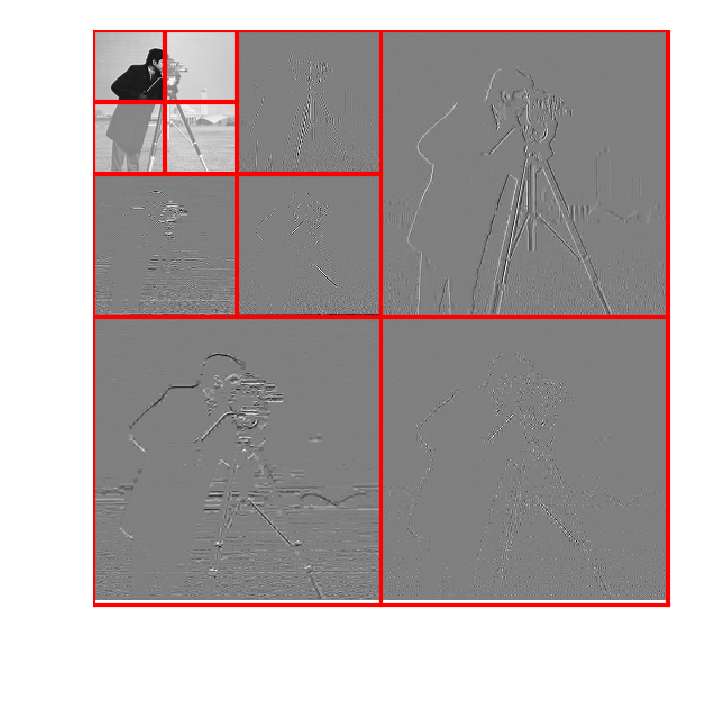

In [84]:
filename='img/cameraman.png'

I=mpimg.imread(filename) 

plt.figure()
plt.imshow(I, cmap='gray')
plt.colorbar()
plt.show()

# Wavelet decomposition
Jmax = int(np.log2(I.shape[0]))  # maximal number of octaves
J = 2

wtcoeffs = pywt.wavedec2(I, wavelet='sym8', level=J, mode ='periodization')
# Casting coeff in a single array
wtcoeffs_arr, coeff_slices = pywt.coeffs_to_array(wtcoeffs)

# Graphical representation
plt.figure(figsize=(4, 4), dpi=200)
plot_wavelet(wtcoeffs_arr, Jmin=Jmax-J);

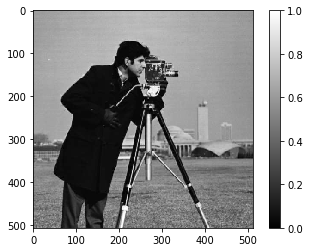

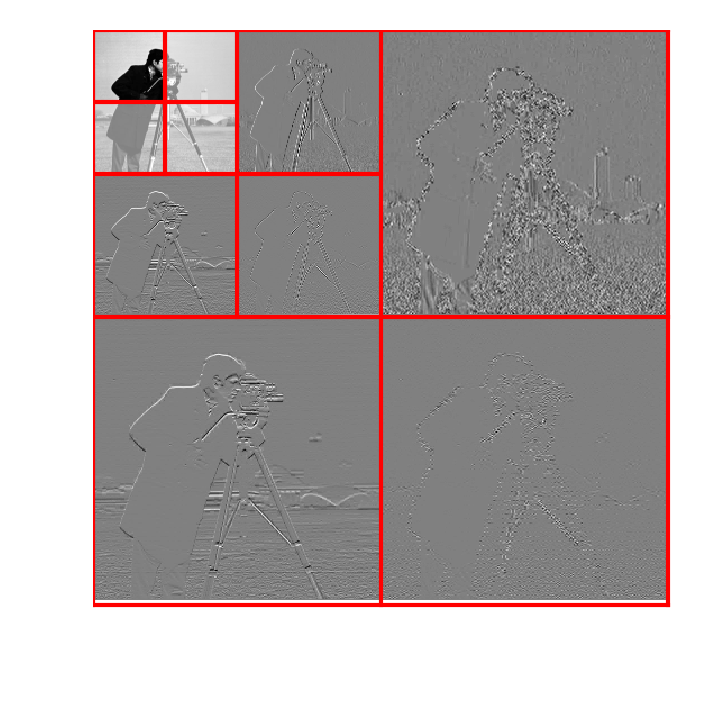

In [85]:
filename='img/cameraman.png'

I=mpimg.imread(filename) 

plt.figure()
plt.imshow(I, cmap='gray')
plt.colorbar()
plt.show()

# Wavelet decomposition
Jmax = int(np.log2(I.shape[0]))  # maximal number of octaves
J = 2

wtcoeffs = pywt.wavedec2(I, wavelet='haar', level=J, mode ='periodization')
# Casting coeff in a single array
wtcoeffs_arr, coeff_slices = pywt.coeffs_to_array(wtcoeffs)

# Graphical representation
plt.figure(figsize=(4, 4), dpi=200)
plot_wavelet(wtcoeffs_arr, Jmin=Jmax-J);

4. The lowest level of detail of the Haar wavelet corresponds to the highest level of detail of the sym8 wavelet. Therefore, the highest level of detail of the Haar wavelet offers much more detail. The Sym8 wavelet filters the information more efficiently. It is logical because the Haar function is segment-wise constant, so any signal within its non-null window can pass.

**Remark:** a 2D wavelet transform is a succession of two 1D DWT. If we consider only 1 step of the multiresolution hierarchy we get:

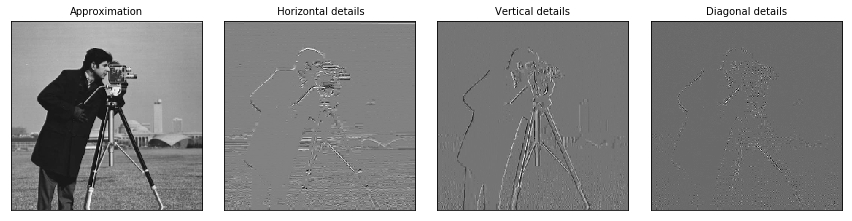

In [86]:
coeffs2 = pywt.dwt2(I, 'sym8')

LL, (LH, HL, HH) = coeffs2

fig = plt.figure(figsize=(12, 3))
titles = ['Approximation', ' Horizontal details',
          'Vertical details', 'Diagonal details']
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

---
## Wavelet filtering <a id="section3"></a> [[back to top](#content)]
This section illustrates a filtering procedure conducted in the wavelet domain. The purpose is to observe that one can filter an image both at a given scale, for specific orientations, and at chosen places on top.

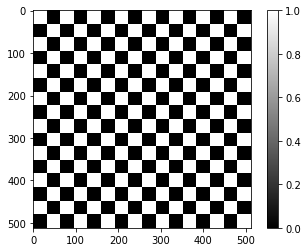

In [87]:
filename='img/chessboard.png'
I=mpimg.imread(filename) 


plt.figure()
plt.imshow(I, cmap='gray')
plt.colorbar()
plt.show()

#### First steps for filtering
We will first use a 1 step decomposition and put some coefficients to zero.

In [88]:
coeffs2 = pywt.dwt2(I, 'db4')

In [89]:
LL, (LH, HL, HH) = coeffs2

In [90]:
L = 8
LL[2**(L-1):2**L+1,2**(L-1):2**L +1] = 0

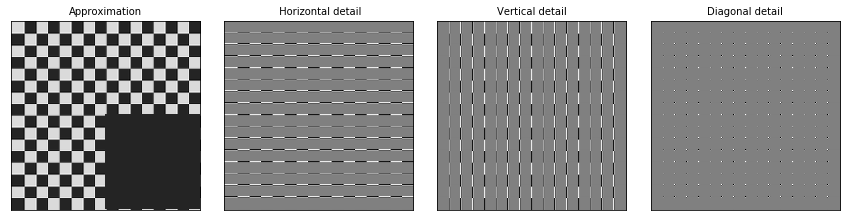

In [91]:
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

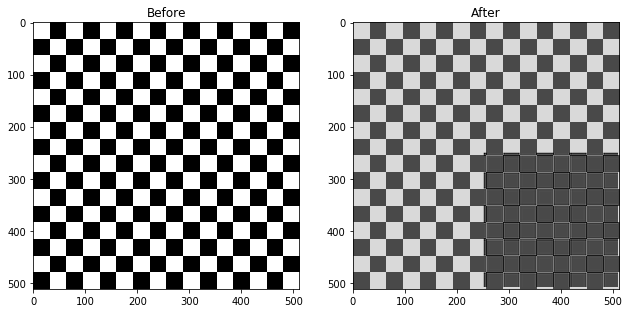

In [92]:
I_d = pywt.idwt2(coeffs2, 'db4')
fig = plt.figure(figsize=(10.5, 4.9))
subplot(121)
plt.imshow(I, cmap='gray')
title('Before')
# plt.colorbar()
subplot(122)
plt.imshow(I_d, cmap='gray')
title('After')
# plt.colorbar()
plt.show()

## Exercise 3 <a id="ex3"></a> [[back to top](#content)]
1. Read the documentation of the `pywt.wavedec2` and `pywt.waverec2` functions to understand how to easily access any set of coefficients for a given scale and orientation.
2. Play with wavelet filtering procedure described above by setting some sets of coefficients to zero (approximation or details of various orientations). Illustrate its result with the `chessboard.png` image.
3. Do the same with any gray level image of your choice (see `img\` folder). 
4. Observe and comment.

1. The pywt.wavedec2 returns a list of the coefficients for all scales and orientations. For the approximation coefficients, we need to access the first elements of that list. The rest of the elements of the list are tuples with 3 arrays each, containing the coefficients for the horizontal, vertical and diagonal details at a certain level, respectively. The levels go from worst to best resolution. For example, if the output of the wavedec function is saved in wtcoeffs, to access the vertical details at level J, we need to extract the coefficient from wtcoeffs[-J][1]. 

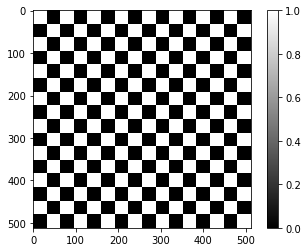

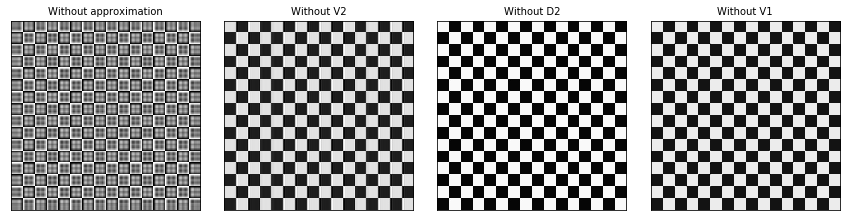

In [93]:
filename='img/chessboard.png'
I=mpimg.imread(filename) 


plt.figure()
plt.imshow(I, cmap='gray')
plt.colorbar()
plt.show() #
J=3
coeffs2 = pywt.wavedec2(I, 'db4',level=J)
coeffs3 = pywt.wavedec2(I, 'db4',level=J)
coeffs4 = pywt.wavedec2(I, 'db4',level=J)
coeffs5 = pywt.wavedec2(I, 'db4',level=J)
coeffs2[0][:,:]=0
coeffs3[2][1][:,:]=0
coeffs4[2][2][:,:]=0
coeffs5[-1][2][:,:]=0
id1=pywt.waverec2(coeffs2, 'db4')
id2=pywt.waverec2(coeffs3, 'db4')
id3=pywt.waverec2(coeffs4, 'db4')
id4=pywt.waverec2(coeffs5, 'db4')


fig = plt.figure(figsize=(12, 3))
titles = ['Without approximation', 'Without V2',
          'Without D2', 'Without V1']
for i, a in enumerate([id1, id2, id3, id4]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, cmap='gray')
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

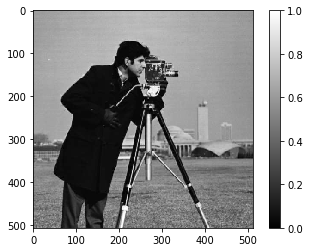

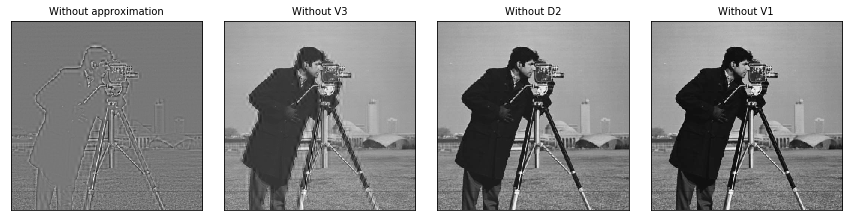

In [94]:
filename='img/cameraman.png'
I=mpimg.imread(filename) 


plt.figure()
plt.imshow(I, cmap='gray')
plt.colorbar()
plt.show() #
J=3
coeffs2 = pywt.wavedec2(I, 'db4',level=J)
coeffs3 = pywt.wavedec2(I, 'db4',level=J)
coeffs4 = pywt.wavedec2(I, 'db4',level=J)
coeffs5 = pywt.wavedec2(I, 'db4',level=J)
coeffs2[0][:,:]=0
coeffs3[-3][1][:,:]=0
coeffs4[2][2][:,:]=0
coeffs5[-1][2][:,:]=0
id1=pywt.waverec2(coeffs2, 'db4')
id2=pywt.waverec2(coeffs3, 'db4')
id3=pywt.waverec2(coeffs4, 'db4')
id4=pywt.waverec2(coeffs5, 'db4')


fig = plt.figure(figsize=(12, 3))
titles = ['Without approximation', 'Without V3',
          'Without D2', 'Without V1']
for i, a in enumerate([id1, id2, id3, id4]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, cmap='gray')
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

4. Without approximation, we lose the information for all the smooth parts of both pictures. Deleting the details still allows for an overall acceptable resolution of the pictures. We notice that for the cameraman picture, deleting the vertical details at level 3 is more deleterious than at level 1. This can be explained by the fact that resolution is lower at level 3, so the loss of information has a bigger impact. It is less apparant for the chessboard image, probably because of the latter's regularity. Deleting the diagonal details does not have a considerable impact on the original picture. 

---
## Wavelet Denoising <a id="section4"></a> [[back to top](#content)]

Wavelets are suitable for denoising signals which contain fast transients. In this context, thresholding can be used to cancel out the wavelet coefficients corresponding to regions where the signal varies smoothly. In these regions, the coefficients are expected to remain small (denoising is then provided by the low-pass cascade), and large wavelet coefficients (corresponding to large and fast transients of the signal) are preserved.

Let's simulate a noisy image to test the denoising procedure described above.

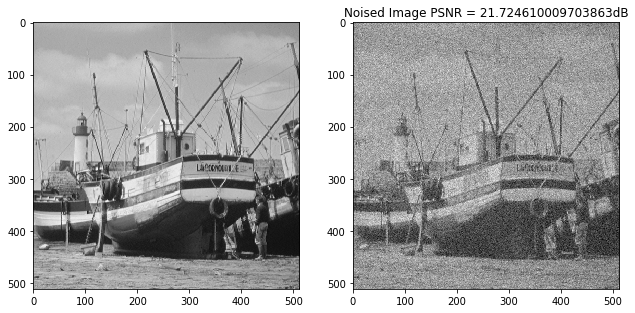

In [95]:
# The original image
filename='img/boat.png'
I=mpimg.imread(filename) 

I = I[:,:,0]

# The noise
sigma = 0.1   # noise level

[n,m] = I.shape
noise = randn(n,m)*sigma  # randn = simulates normalized Gaussian random variables

# The noisy image
I_noisy = I + noise

# The PSNR quantifies the level of noise (see below for more explanations)
psnr1=psnr(I,I_noisy, vmax=-1)


# Graphical representation
fig = plt.figure(figsize=(10.5, 4.9))
subplot(121)
plt.imshow(I , cmap='gray')
# plt.colorbar()
subplot(122)
plt.imshow(I_noisy, cmap='gray')
title('Noised Image PSNR = {}dB'.format(psnr1))
# plt.colorbar()
plt.show()

#### Peak signal-to-noise ratio: definition
The peak signal-to-noise ratio (PSNR) is defined as the ratio between the maximum possible power of a signal and the power of the noise that affecting its representation. Since many signals have a very wide dynamic range, the PSNR is usually expressed in decibel scale (dB).

The PSNR is usually defined via the mean squared error (MSE). Given a noise-free $m \times n$ monochromatic image $I$ and its noisy approximation $K$, the MSE is defined as:

$$\mathrm{MSE} = \frac{1}{m\,n}\sum_{i=0}^{m-1}\sum_{j=0}^{n-1} [I(i,j) - K(i,j)]^2 = \frac{1}{m\,n} \|I - K \|^2_{\text{F}}.$$

The PSNR in decibel (dB) is defined as:

\begin{align}
\mathrm{PSNR} &= 10 \log_{10} \left( \frac{\mathrm{MAX}_I^2}{\mathrm{MSE}} \right)\\ 
    &= 20 \log_{10} \left( {\mathrm{MAX}_I} \right) - 10 \log_{10} \left( {{\mathrm{MSE}}} \right)
\end{align}

where $\mathrm{MAX}_I$ corresponds to the maximum possible value taken by a pixel of the image. When the pixels are represented using 8 bits per sample, this is 255. The lower the error, the higher the PSNR.

**Extension to color images**: for color images, with containing three values per pixel (RGB representation), the definition of the PSNR is the similar, except the MSE is the sum over all squared value differences (for each color, i.e. three times as many values as in a monochromatic image) divided by 3 times the image size. 

### Thresholding
You can either use the `pywt.threshold` function, or a custom function as implemented below:

In [96]:
def perform_hardthresholding(f,thres):
    return f*(abs(f) > thres)

In [97]:
# Wavelet decomposition
Jmax = int(np.log2(I_noisy.shape[0]))  # maximal number of octaves
J = 5

coeffs = pywt.wavedec2(I_noisy, wavelet='sym8', level=J, mode ='periodization' )

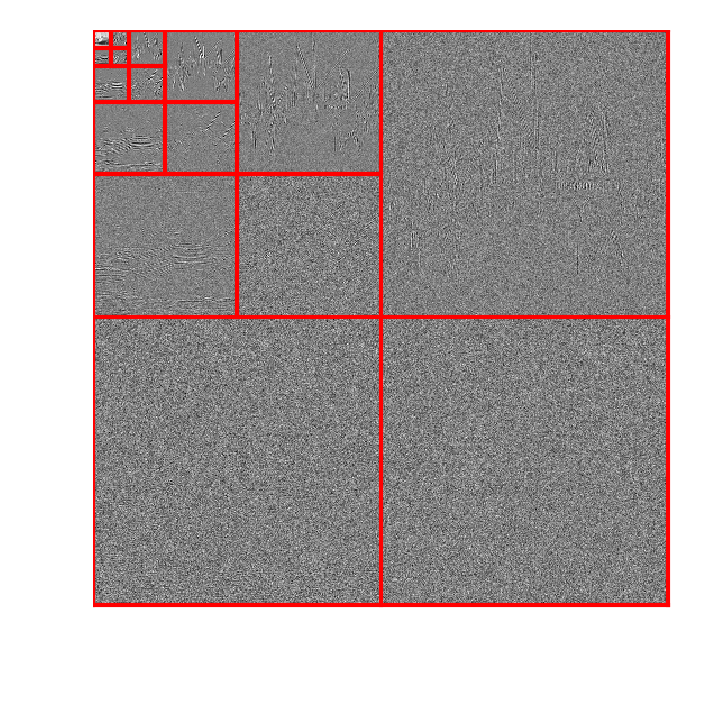

In [98]:
# Conversion to an array for graphical representation
coeffs_array, coeff_slices = pywt.coeffs_to_array(coeffs)

plt.figure(figsize=(4, 4), dpi=200)
plot_wavelet(coeffs_array, Jmin=Jmax-J);

In the following, we will keep the approximation coefficients unchanged, and only threshold details coefficients. Futher indications are provided below.

In [99]:
# Thresholding detail coefficients only (while preserving approximation coefficients)
# 1) threshold all coefficients stored in an array
# 2) reset approx coefficients to their original value

thres = 2.*sigma
coeffs_arr_hard = perform_hardthresholding(coeffs_array,thres)

In [100]:
# convert the array of coeffcients to pywt coeffs
coeffs_hard = pywt.array_to_coeffs(coeffs_arr_hard, coeff_slices)

# Setting original approximation coefficients back
coeffs_hard[0] = coeffs[0]  # approximation preserved

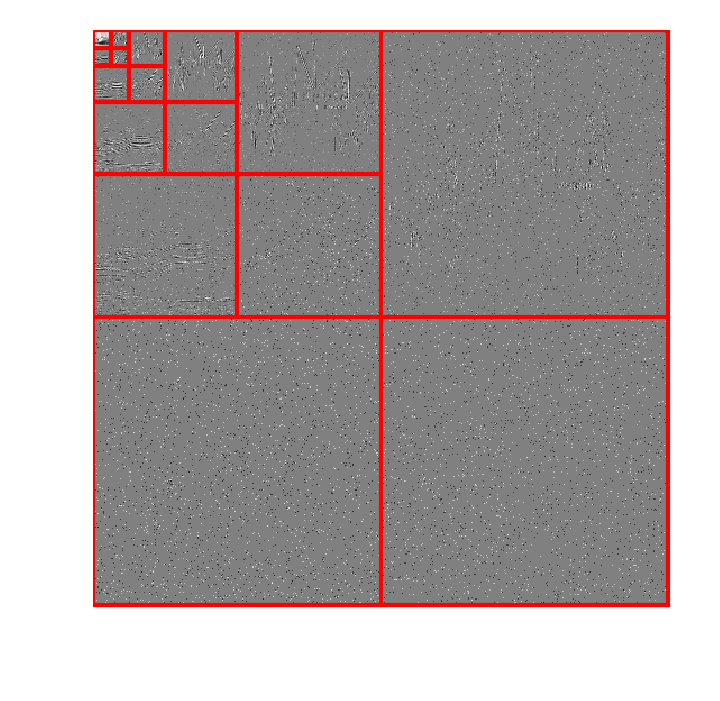

In [101]:
# Back to an array for graphical representation
coeffs_hard_arr, slices = pywt.coeffs_to_array(coeffs_hard)

plt.figure(figsize=(4, 4), dpi=200)
plot_wavelet(coeffs_hard_arr, Jmin=Jmax-J);

#### Reconstruction 

In [102]:
I_den = pywt.waverecn(coeffs_hard, 'sym8', mode='periodization') # Multilevel n-dimensional Inverse Discrete Wavelet Transform

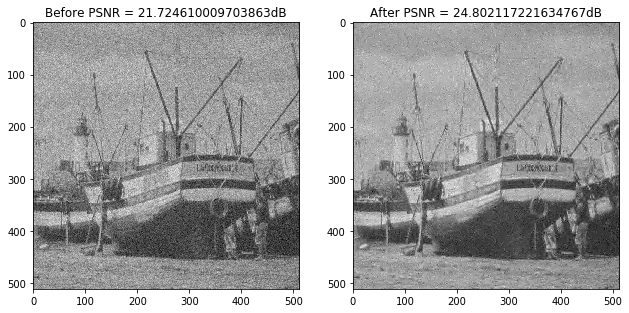

In [103]:
psnr2=psnr(I,I_den, vmax=-1)
fig = plt.figure(figsize=(10.5, 4.9))
subplot(121)
plt.imshow(I_noisy , cmap='gray')
title('Before PSNR = {}dB'.format(psnr1))
# plt.colorbar()
subplot(122)
plt.imshow(I_den, cmap='gray')
title('After PSNR = {}dB'.format(psnr2))
# plt.colorbar()
plt.show()

### Exercise 4 <a id="ex4"></a> [[back to top](#content)]
1. Observe the effect of the level of the decomposition and of the threshold.
2. Optimize the parameters of your wavelet denoising strategy to get the best possible PSNR. 

1. By changing the level of the decomposition, we do not observe any significant changes in pictures for a low threshold. However, for higher thresholds, we do observe a difference, as the denoised image seems blurrier (e.g. J=1 and thres=2 vs J=5 and thres=2). For a given level of decomposition, the variation of the threshold has a bigger impact on the denoised picture.
2. For a given level of decomposition, when the threshold increases, the PSNR increases then decreases. Similarly, for a given threshold, when the level of decomposition increases, the PSNR increases and decreases. We tried several values for the level of decomposition and the threshold, and we found that the best performance was at a threshold of 0.3 and a level of decomposition of 2. For these parameters, we obtain a PSNR of 27.01.

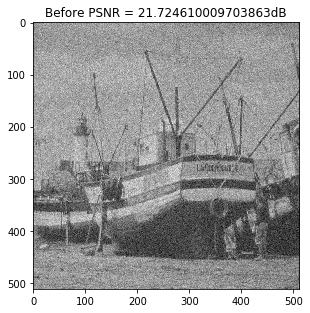

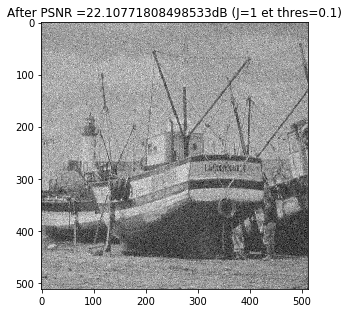

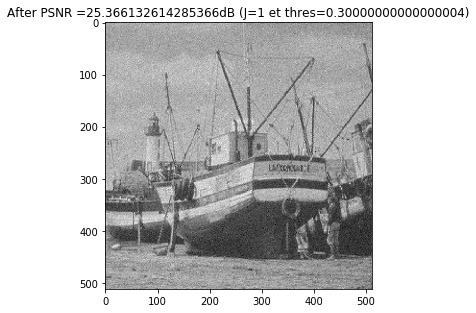

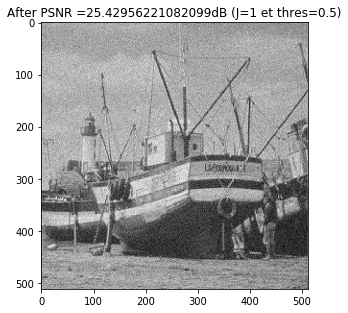

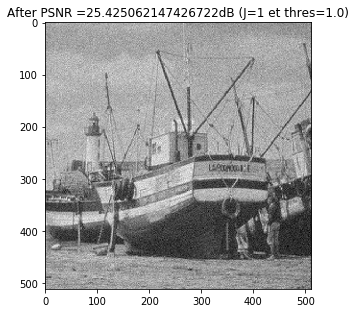

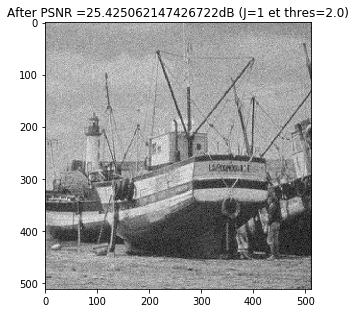

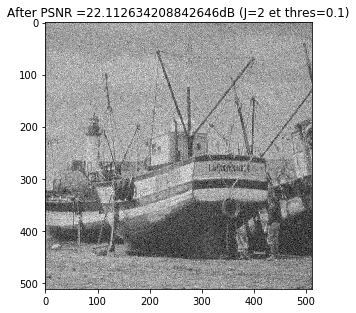

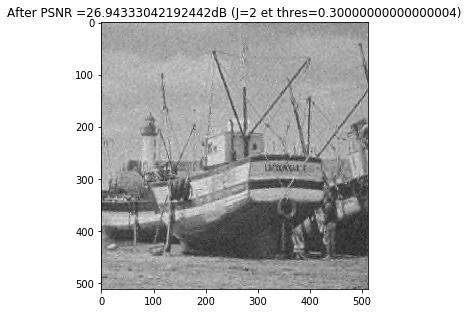

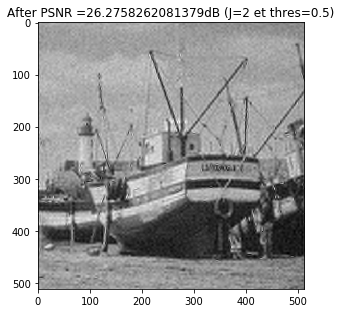

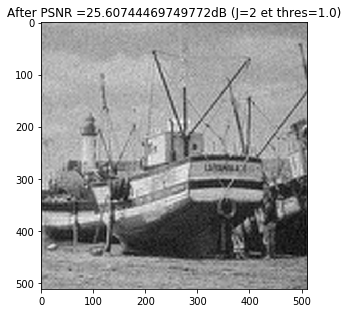

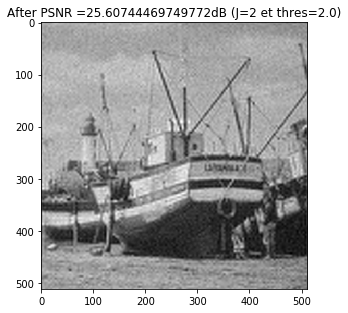

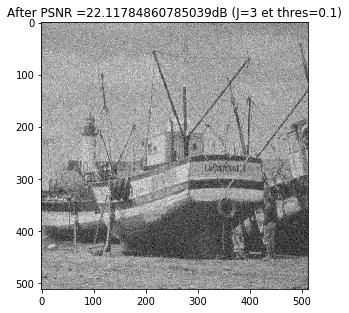

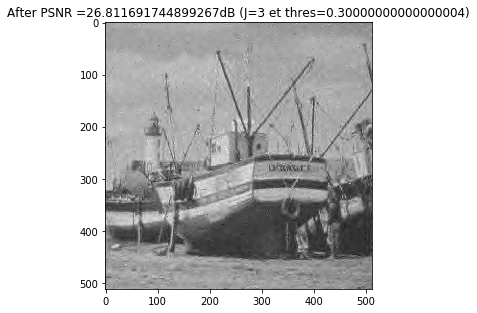

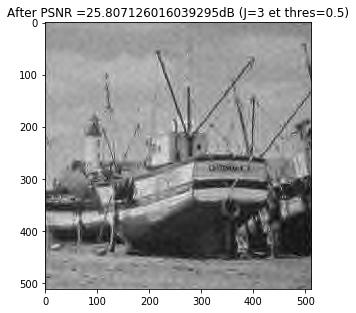

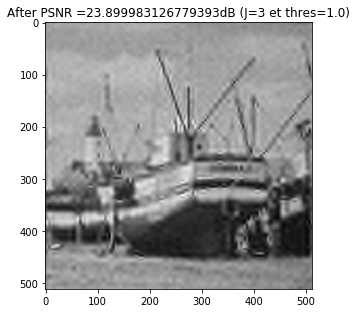

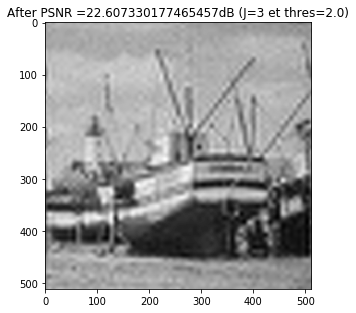

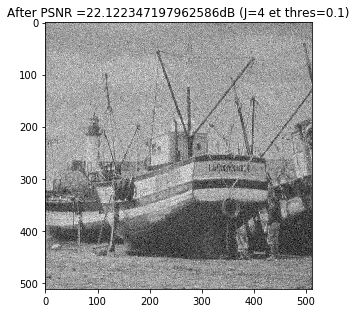

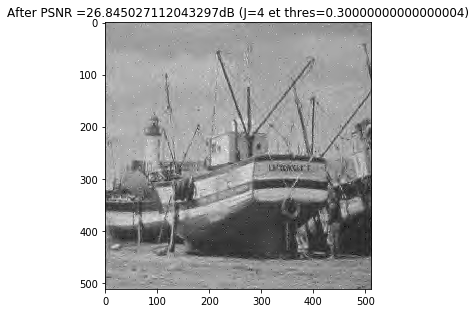

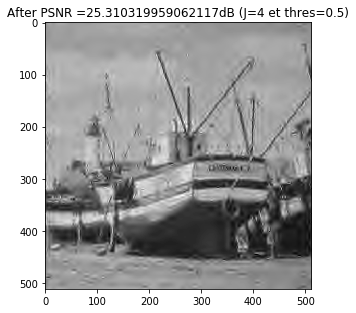

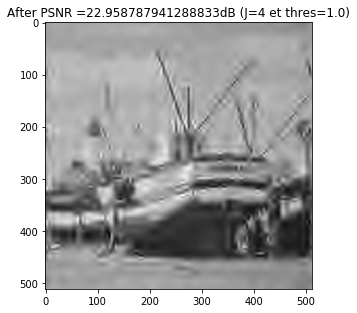

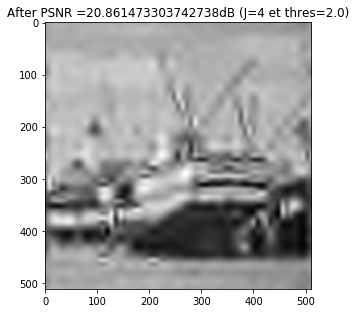

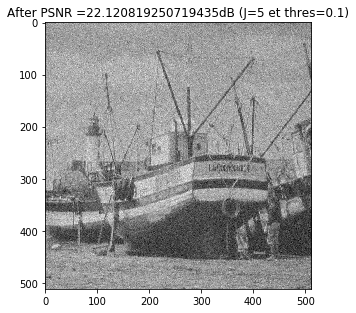

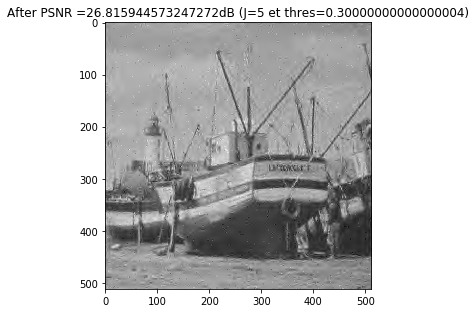

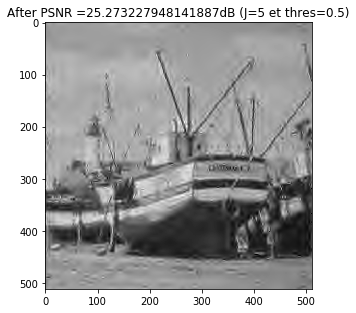

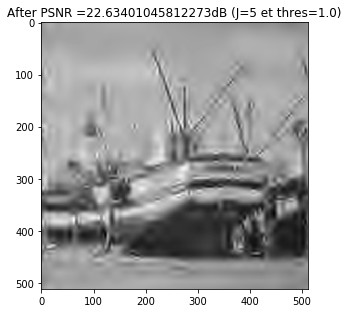

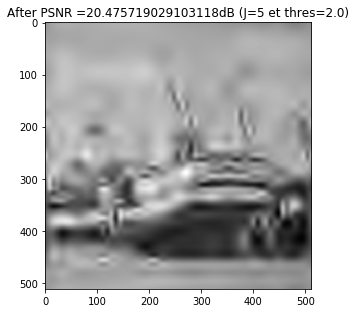

In [104]:
fig = plt.figure(figsize=(10.5, 4.9))
subplot(121)
plt.imshow(I_noisy , cmap='gray')
title('Before PSNR = {}dB'.format(psnr1))
        
for i in range (1,6): 
    for j in [1,3,5,10,20]:
# Wavelet decomposition
        Jmax = int(np.log2(I_noisy.shape[0]))  # maximal number of octaves
        J = i

        coeffs = pywt.wavedec2(I_noisy, wavelet='sym8', level=J, mode ='periodization' )

# Conversion to an array for graphical representation
        coeffs_array, coeff_slices = pywt.coeffs_to_array(coeffs)

        thres = j*sigma
        coeffs_arr_hard = perform_hardthresholding(coeffs_array,thres)

        # convert the array of coeffcients to pywt coeffs
        coeffs_hard = pywt.array_to_coeffs(coeffs_arr_hard, coeff_slices)

        # Setting original approximation coefficients back
        coeffs_hard[0] = coeffs[0]  # approximation preserved

        # Back to an array for graphical representation
        coeffs_hard_arr, slices = pywt.coeffs_to_array(coeffs_hard)


        I_den = pywt.waverecn(coeffs_hard, 'sym8', mode='periodization')

        psnr2=psnr(I,I_den, vmax=-1)
        
        # plt.colorbar()
        fig = plt.figure(figsize=(10.5, 4.9))
        subplot(122)
        plt.imshow(I_den, cmap='gray')
        title('After PSNR =' + str(psnr2) + 'dB (J='+str(i)+' et thres='+str(thres)+')')
        # plt.colorbar()
        plt.show()

### Exercise 5 (optional) <a id="ex5"></a> [[back to top](#content)]
Optimize your denoising strategy by using a translation invariant wavelet transform provided by `pywt.swt2` (stationary wavelet transform).

-- Your comments

In [14]:
for i in range (1,6): 
    for j in [0.1,1,3,5,10,20]:
# Wavelet decomposition
        Jmax = int(np.log2(I_noisy.shape[0]))  # maximal number of octaves
        J = 3

        coeffs = pywt.swt2(I_noisy, wavelet='sym8', level=J,  trim_approx=False)
#(data, wavelet, level, start_level=0, axes=(-2, -1), trim_approx=False, norm=False)
# Conversion to an array for graphical representation

               
        coeffs_array, coeff_slices = pywt.coeffs_to_array(coeffs)

        thres = j*sigma
        coeffs_arr_hard = perform_hardthresholding(coeffs_array,thres)

        # convert the array of coeffcients to pywt coeffs
        coeffs_hard = pywt.array_to_coeffs(coeffs_arr_hard, coeff_slices)

        # Setting original approximation coefficients back
        coeffs_hard[0] = coeffs[0]  # approximation preserved

        # Back to an array for graphical representation
        coeffs_hard_arr, slices = pywt.coeffs_to_array(coeffs_hard)


        I_den = pywt.waverecn(coeffs_hard, 'sym8', mode='periodization')

        psnr2=psnr(I,I_den, vmax=-1)
        fig = plt.figure(figsize=(15, 7))
        subplot(121)
        plt.imshow(I_noisy , cmap='gray')
        title('Before PSNR = {}dB'.format(psnr1))
        # plt.colorbar()
        subplot(122)
        plt.imshow(I_den, cmap='gray')
        title('After PSNR =' + str(psnr2) + 'dB (J='+str(i)+' et thres='+str(thres)+')')
        # plt.colorbar()
        plt.show()

ValueError: first list element must be a numpy array

t=  3
t=  4
t=  5
t=  6
t=  7
t=  8
t=  9
t=  10
t=  11
t=  12
t=  13
t=  14
t=  15
t=  16
t=  17
t=  18
t=  19
t=  20
t=  21
t=  22
t=  23
t=  24
t=  25
t=  26
t=  27
t=  28
t=  29
t=  30
t=  31
t=  32
t=  33
t=  34
t=  35
t=  36
t=  37
t=  38
t=  39
t=  40
t=  41
t=  42
t=  43
t=  44
t=  45
t=  46
t=  47
t=  48
t=  49
t=  50
t=  51
t=  52
t=  53
t=  54
t=  55
t=  56
t=  57
t=  58
t=  59
t=  60
t=  61
t=  62
t=  63
t=  64
t=  65
t=  66
t=  67
t=  68
t=  69
t=  70
t=  71
t=  72
t=  73
t=  74
t=  75
t=  76
t=  77
t=  78
t=  79
t=  80
t=  81
t=  82
t=  83
t=  84
t=  85
t=  86
t=  87
t=  88
t=  89
t=  90
t=  91
t=  92
t=  93
t=  94
t=  95
t=  96
t=  97
t=  98
t=  99
t=  100
t=  101
t=  102
t=  103
t=  104
t=  105
t=  106
t=  107
t=  108
t=  109
t=  110
t=  111
t=  112
t=  113
t=  114
t=  115
t=  116
t=  117
t=  118
t=  119
t=  120
t=  121
t=  122
t=  123
t=  124
t=  125
t=  126
t=  127
t=  128
t=  129
t=  130
t=  131
t=  132
t=  133
t=  134
t=  135
t=  136
t=  137
t=  138
t=  139
t=  140


t=  1083
t=  1084
t=  1085
t=  1086
t=  1087
t=  1088
t=  1089
t=  1090
t=  1091
t=  1092
t=  1093
t=  1094
t=  1095
t=  1096
t=  1097
t=  1098
t=  1099
t=  1100
t=  1101
t=  1102
t=  1103
t=  1104
t=  1105
t=  1106
t=  1107
t=  1108
t=  1109
t=  1110
t=  1111
t=  1112
t=  1113
t=  1114
t=  1115
t=  1116
t=  1117
t=  1118
t=  1119
t=  1120
t=  1121
t=  1122
t=  1123
t=  1124
t=  1125
t=  1126
t=  1127
t=  1128
t=  1129
t=  1130
t=  1131
t=  1132
t=  1133
t=  1134
t=  1135
t=  1136
t=  1137
t=  1138
t=  1139
t=  1140
t=  1141
t=  1142
t=  1143
t=  1144
t=  1145
t=  1146
t=  1147
t=  1148
t=  1149
t=  1150
t=  1151
t=  1152
t=  1153
t=  1154
t=  1155
t=  1156
t=  1157
t=  1158
t=  1159
t=  1160
t=  1161
t=  1162
t=  1163
t=  1164
t=  1165
t=  1166
t=  1167
t=  1168
t=  1169
t=  1170
t=  1171
t=  1172
t=  1173
t=  1174
t=  1175
t=  1176
t=  1177
t=  1178
t=  1179
t=  1180
t=  1181
t=  1182
t=  1183
t=  1184
t=  1185
t=  1186
t=  1187
t=  1188
t=  1189
t=  1190
t=  1191
t=  1192
t=  1193
t

t=  1997
t=  1998
t=  1999
t=  2000
t=  2001
t=  2002
t=  2003
t=  2004
t=  2005
t=  2006
t=  2007
t=  2008
t=  2009
t=  2010
t=  2011
t=  2012
t=  2013
t=  2014
t=  2015
t=  2016
t=  2017
t=  2018
t=  2019
t=  2020
t=  2021
t=  2022
t=  2023
t=  2024
t=  2025
t=  2026
t=  2027
t=  2028
t=  2029
t=  2030
t=  2031
t=  2032
t=  2033
t=  2034
t=  2035
t=  2036
t=  2037
t=  2038
t=  2039
t=  2040
t=  2041
t=  2042
t=  2043
t=  2044
t=  2045
t=  2046
t=  2047
t=  2048
t=  2049
t=  2050
t=  2051
t=  2052
t=  2053
t=  2054
t=  2055
t=  2056
t=  2057
t=  2058
t=  2059
t=  2060
t=  2061
t=  2062
t=  2063
t=  2064
t=  2065
t=  2066
t=  2067
t=  2068
t=  2069
t=  2070
t=  2071
t=  2072
t=  2073
t=  2074
t=  2075
t=  2076
t=  2077
t=  2078
t=  2079
t=  2080
t=  2081
t=  2082
t=  2083
t=  2084
t=  2085
t=  2086
t=  2087
t=  2088
t=  2089
t=  2090
t=  2091
t=  2092
t=  2093
t=  2094
t=  2095
t=  2096
t=  2097
t=  2098
t=  2099
t=  2100
t=  2101
t=  2102
t=  2103
t=  2104
t=  2105
t=  2106
t=  2107
t

t=  2923
t=  2924
t=  2925
t=  2926
t=  2927
t=  2928
t=  2929
t=  2930
t=  2931
t=  2932
t=  2933
t=  2934
t=  2935
t=  2936
t=  2937
t=  2938
t=  2939
t=  2940
t=  2941
t=  2942
t=  2943
t=  2944
t=  2945
t=  2946
t=  2947
t=  2948
t=  2949
t=  2950
t=  2951
t=  2952
t=  2953
t=  2954
t=  2955
t=  2956
t=  2957
t=  2958
t=  2959
t=  2960
t=  2961
t=  2962
t=  2963
t=  2964
t=  2965
t=  2966
t=  2967
t=  2968
t=  2969
t=  2970
t=  2971
t=  2972
t=  2973
t=  2974
t=  2975
t=  2976
t=  2977
t=  2978
t=  2979
t=  2980
t=  2981
t=  2982
t=  2983
t=  2984
t=  2985
t=  2986
t=  2987
t=  2988
t=  2989
t=  2990
t=  2991
t=  2992
t=  2993
t=  2994
t=  2995
t=  2996
t=  2997
t=  2998
t=  2999
t=  3000
t=  3001
t=  3002
t=  3003
t=  3004
t=  3005
t=  3006
t=  3007
t=  3008
t=  3009
t=  3010
t=  3011
t=  3012
t=  3013
t=  3014
t=  3015
t=  3016
t=  3017
t=  3018
t=  3019
t=  3020
t=  3021
t=  3022
t=  3023
t=  3024
t=  3025
t=  3026
t=  3027
t=  3028
t=  3029
t=  3030
t=  3031
t=  3032
t=  3033
t

t=  3846
t=  3847
t=  3848
t=  3849
t=  3850
t=  3851
t=  3852
t=  3853
t=  3854
t=  3855
t=  3856
t=  3857
t=  3858
t=  3859
t=  3860
t=  3861
t=  3862
t=  3863
t=  3864
t=  3865
t=  3866
t=  3867
t=  3868
t=  3869
t=  3870
t=  3871
t=  3872
t=  3873
t=  3874
t=  3875
t=  3876
t=  3877
t=  3878
t=  3879
t=  3880
t=  3881
t=  3882
t=  3883
t=  3884
t=  3885
t=  3886
t=  3887
t=  3888
t=  3889
t=  3890
t=  3891
t=  3892
t=  3893
t=  3894
t=  3895
t=  3896
t=  3897
t=  3898
t=  3899
t=  3900
t=  3901
t=  3902
t=  3903
t=  3904
t=  3905
t=  3906
t=  3907
t=  3908
t=  3909
t=  3910
t=  3911
t=  3912
t=  3913
t=  3914
t=  3915
t=  3916
t=  3917
t=  3918
t=  3919
t=  3920
t=  3921
t=  3922
t=  3923
t=  3924
t=  3925
t=  3926
t=  3927
t=  3928
t=  3929
t=  3930
t=  3931
t=  3932
t=  3933
t=  3934
t=  3935
t=  3936
t=  3937
t=  3938
t=  3939
t=  3940
t=  3941
t=  3942
t=  3943
t=  3944
t=  3945
t=  3946
t=  3947
t=  3948
t=  3949
t=  3950
t=  3951
t=  3952
t=  3953
t=  3954
t=  3955
t=  3956
t

t=  4759
t=  4760
t=  4761
t=  4762
t=  4763
t=  4764
t=  4765
t=  4766
t=  4767
t=  4768
t=  4769
t=  4770
t=  4771
t=  4772
t=  4773
t=  4774
t=  4775
t=  4776
t=  4777
t=  4778
t=  4779
t=  4780
t=  4781
t=  4782
t=  4783
t=  4784
t=  4785
t=  4786
t=  4787
t=  4788
t=  4789
t=  4790
t=  4791
t=  4792
t=  4793
t=  4794
t=  4795
t=  4796
t=  4797
t=  4798
t=  4799
t=  4800
t=  4801
t=  4802
t=  4803
t=  4804
t=  4805
t=  4806
t=  4807
t=  4808
t=  4809
t=  4810
t=  4811
t=  4812
t=  4813
t=  4814
t=  4815
t=  4816
t=  4817
t=  4818
t=  4819
t=  4820
t=  4821
t=  4822
t=  4823
t=  4824
t=  4825
t=  4826
t=  4827
t=  4828
t=  4829
t=  4830
t=  4831
t=  4832
t=  4833
t=  4834
t=  4835
t=  4836
t=  4837
t=  4838
t=  4839
t=  4840
t=  4841
t=  4842
t=  4843
t=  4844
t=  4845
t=  4846
t=  4847
t=  4848
t=  4849
t=  4850
t=  4851
t=  4852
t=  4853
t=  4854
t=  4855
t=  4856
t=  4857
t=  4858
t=  4859
t=  4860
t=  4861
t=  4862
t=  4863
t=  4864
t=  4865
t=  4866
t=  4867
t=  4868
t=  4869
t

t=  5678
t=  5679
t=  5680
t=  5681
t=  5682
t=  5683
t=  5684
t=  5685
t=  5686
t=  5687
t=  5688
t=  5689
t=  5690
t=  5691
t=  5692
t=  5693
t=  5694
t=  5695
t=  5696
t=  5697
t=  5698
t=  5699
t=  5700
t=  5701
t=  5702
t=  5703
t=  5704
t=  5705
t=  5706
t=  5707
t=  5708
t=  5709
t=  5710
t=  5711
t=  5712
t=  5713
t=  5714
t=  5715
t=  5716
t=  5717
t=  5718
t=  5719
t=  5720
t=  5721
t=  5722
t=  5723
t=  5724
t=  5725
t=  5726
t=  5727
t=  5728
t=  5729
t=  5730
t=  5731
t=  5732
t=  5733
t=  5734
t=  5735
t=  5736
t=  5737
t=  5738
t=  5739
t=  5740
t=  5741
t=  5742
t=  5743
t=  5744
t=  5745
t=  5746
t=  5747
t=  5748
t=  5749
t=  5750
t=  5751
t=  5752
t=  5753
t=  5754
t=  5755
t=  5756
t=  5757
t=  5758
t=  5759
t=  5760
t=  5761
t=  5762
t=  5763
t=  5764
t=  5765
t=  5766
t=  5767
t=  5768
t=  5769
t=  5770
t=  5771
t=  5772
t=  5773
t=  5774
t=  5775
t=  5776
t=  5777
t=  5778
t=  5779
t=  5780
t=  5781
t=  5782
t=  5783
t=  5784
t=  5785
t=  5786
t=  5787
t=  5788
t

t=  6599
t=  6600
t=  6601
t=  6602
t=  6603
t=  6604
t=  6605
t=  6606
t=  6607
t=  6608
t=  6609
t=  6610
t=  6611
t=  6612
t=  6613
t=  6614
t=  6615
t=  6616
t=  6617
t=  6618
t=  6619
t=  6620
t=  6621
t=  6622
t=  6623
t=  6624
t=  6625
t=  6626
t=  6627
t=  6628
t=  6629
t=  6630
t=  6631
t=  6632
t=  6633
t=  6634
t=  6635
t=  6636
t=  6637
t=  6638
t=  6639
t=  6640
t=  6641
t=  6642
t=  6643
t=  6644
t=  6645
t=  6646
t=  6647
t=  6648
t=  6649
t=  6650
t=  6651
t=  6652
t=  6653
t=  6654
t=  6655
t=  6656
t=  6657
t=  6658
t=  6659
t=  6660
t=  6661
t=  6662
t=  6663
t=  6664
t=  6665
t=  6666
t=  6667
t=  6668
t=  6669
t=  6670
t=  6671
t=  6672
t=  6673
t=  6674
t=  6675
t=  6676
t=  6677
t=  6678
t=  6679
t=  6680
t=  6681
t=  6682
t=  6683
t=  6684
t=  6685
t=  6686
t=  6687
t=  6688
t=  6689
t=  6690
t=  6691
t=  6692
t=  6693
t=  6694
t=  6695
t=  6696
t=  6697
t=  6698
t=  6699
t=  6700
t=  6701
t=  6702
t=  6703
t=  6704
t=  6705
t=  6706
t=  6707
t=  6708
t=  6709
t

t=  7520
t=  7521
t=  7522
t=  7523
t=  7524
t=  7525
t=  7526
t=  7527
t=  7528
t=  7529
t=  7530
t=  7531
t=  7532
t=  7533
t=  7534
t=  7535
t=  7536
t=  7537
t=  7538
t=  7539
t=  7540
t=  7541
t=  7542
t=  7543
t=  7544
t=  7545
t=  7546
t=  7547
t=  7548
t=  7549
t=  7550
t=  7551
t=  7552
t=  7553
t=  7554
t=  7555
t=  7556
t=  7557
t=  7558
t=  7559
t=  7560
t=  7561
t=  7562
t=  7563
t=  7564
t=  7565
t=  7566
t=  7567
t=  7568
t=  7569
t=  7570
t=  7571
t=  7572
t=  7573
t=  7574
t=  7575
t=  7576
t=  7577
t=  7578
t=  7579
t=  7580
t=  7581
t=  7582
t=  7583
t=  7584
t=  7585
t=  7586
t=  7587
t=  7588
t=  7589
t=  7590
t=  7591
t=  7592
t=  7593
t=  7594
t=  7595
t=  7596
t=  7597
t=  7598
t=  7599
t=  7600
t=  7601
t=  7602
t=  7603
t=  7604
t=  7605
t=  7606
t=  7607
t=  7608
t=  7609
t=  7610
t=  7611
t=  7612
t=  7613
t=  7614
t=  7615
t=  7616
t=  7617
t=  7618
t=  7619
t=  7620
t=  7621
t=  7622
t=  7623
t=  7624
t=  7625
t=  7626
t=  7627
t=  7628
t=  7629
t=  7630
t

t=  8434
t=  8435
t=  8436
t=  8437
t=  8438
t=  8439
t=  8440
t=  8441
t=  8442
t=  8443
t=  8444
t=  8445
t=  8446
t=  8447
t=  8448
t=  8449
t=  8450
t=  8451
t=  8452
t=  8453
t=  8454
t=  8455
t=  8456
t=  8457
t=  8458
t=  8459
t=  8460
t=  8461
t=  8462
t=  8463
t=  8464
t=  8465
t=  8466
t=  8467
t=  8468
t=  8469
t=  8470
t=  8471
t=  8472
t=  8473
t=  8474
t=  8475
t=  8476
t=  8477
t=  8478
t=  8479
t=  8480
t=  8481
t=  8482
t=  8483
t=  8484
t=  8485
t=  8486
t=  8487
t=  8488
t=  8489
t=  8490
t=  8491
t=  8492
t=  8493
t=  8494
t=  8495
t=  8496
t=  8497
t=  8498
t=  8499
t=  8500
t=  8501
t=  8502
t=  8503
t=  8504
t=  8505
t=  8506
t=  8507
t=  8508
t=  8509
t=  8510
t=  8511
t=  8512
t=  8513
t=  8514
t=  8515
t=  8516
t=  8517
t=  8518
t=  8519
t=  8520
t=  8521
t=  8522
t=  8523
t=  8524
t=  8525
t=  8526
t=  8527
t=  8528
t=  8529
t=  8530
t=  8531
t=  8532
t=  8533
t=  8534
t=  8535
t=  8536
t=  8537
t=  8538
t=  8539
t=  8540
t=  8541
t=  8542
t=  8543
t=  8544
t

t=  9351
t=  9352
t=  9353
t=  9354
t=  9355
t=  9356
t=  9357
t=  9358
t=  9359
t=  9360
t=  9361
t=  9362
t=  9363
t=  9364
t=  9365
t=  9366
t=  9367
t=  9368
t=  9369
t=  9370
t=  9371
t=  9372
t=  9373
t=  9374
t=  9375
t=  9376
t=  9377
t=  9378
t=  9379
t=  9380
t=  9381
t=  9382
t=  9383
t=  9384
t=  9385
t=  9386
t=  9387
t=  9388
t=  9389
t=  9390
t=  9391
t=  9392
t=  9393
t=  9394
t=  9395
t=  9396
t=  9397
t=  9398
t=  9399
t=  9400
t=  9401
t=  9402
t=  9403
t=  9404
t=  9405
t=  9406
t=  9407
t=  9408
t=  9409
t=  9410
t=  9411
t=  9412
t=  9413
t=  9414
t=  9415
t=  9416
t=  9417
t=  9418
t=  9419
t=  9420
t=  9421
t=  9422
t=  9423
t=  9424
t=  9425
t=  9426
t=  9427
t=  9428
t=  9429
t=  9430
t=  9431
t=  9432
t=  9433
t=  9434
t=  9435
t=  9436
t=  9437
t=  9438
t=  9439
t=  9440
t=  9441
t=  9442
t=  9443
t=  9444
t=  9445
t=  9446
t=  9447
t=  9448
t=  9449
t=  9450
t=  9451
t=  9452
t=  9453
t=  9454
t=  9455
t=  9456
t=  9457
t=  9458
t=  9459
t=  9460
t=  9461
t

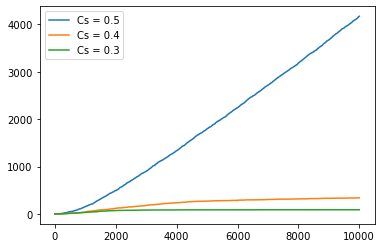

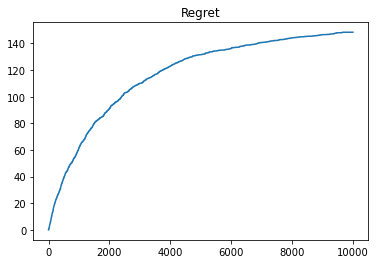

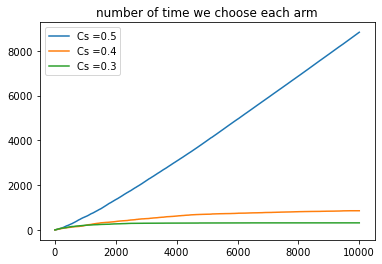

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class TS():
    
    def __init__(self,G):
        K = len(G)
        self.sigma = 100*np.ones(K)
        self.mu = np.zeros(K)
        self.N = np.zeros(K)
        self.samples=[[] for i in range(K)]
        self.goal = G
    
    def step(self,mu_p):
        sample = np.random.normal(mu_p,self.sigma)
        j = np.argmax(sample)
        self.visit(j)
        return j
    
    def update(self,p):
        self.N[p]+=1
        self.sigma[p] = 1/np.sqrt(1/(100**2) + self.N[p])
        self.mu[p] = (self.sigma[p]**2)*np.sum(self.samples[p])
        
    def visit(self,j):
        vis = np.random.normal(self.goal[j])
        self.samples[j].append(vis)
        self.update(j)
        return vis

def UD_TS(K,lbd,T):
    Nk = np.ones(K)
    O = np.zeros(K)
    D=[]
    A=[]
    S=np.zeros([T,K])
    Regret = np.zeros(T)
    Nb_choice = np.zeros([T,K])
    for t in range(K):
        D.append(np.random.geometric(lbd))
        A.append(t)
        if D[-1]==0:
            S[t] = onehot(t,K)
        else:
            S[t] = np.zeros(K)
    Sk = np.zeros(K)   
    for t in range(K,T):
        Nk_tilde = Nk - O
        for k in range(K):
            Sk[k] += Yt(k,D,A,t)
        S[t] = Sk
        Theta_k = Sk / Nk_tilde
        At = my_TS.step(Theta_k)
        D.append(np.random.geometric(lbd))
        O = lbd*O + onehot(At,K)
        Nk += onehot(At,K)
        A.append(At)
        print('t= ',t)
        Regret[t] = t*np.max(Theta_H)
        for at in A:
            Regret[t] -= Theta_H[at]
        Nb_choice[t] = Nb_choice[t-1]
        Nb_choice[t][At] += 1
    return S,Regret,Nb_choice

def Yt(k,D,A,t):
    res=0
    for s in range(t):
        if D[s] == t-s:
            if A[s] == k:
                res += float(np.random.random()<Theta_H[k])
    return res


def onehot(At,K):
    res = np.zeros(K)
    res[At] = 1
    return res


mu = 500
lbd = 1/mu
m = 1000
T = 10000

Theta_H = [0.5,0.4,0.3]
my_TS = TS(Theta_H)
K=len(Theta_H)

S,Regret,Nb_choice = UD_TS(K,lbd,T)
S=np.array(S)

for k in range(K):
    plt.plot(S[:,k],label='Cs = '+str(Theta_H[k]))
plt.legend()
plt.show()

plt.plot(Regret)
plt.title('Regret')
plt.show()

for k in range(K):
    plt.plot(Nb_choice[:,k],label='Cs ='+str(Theta_H[k]))
plt.title('number of time we choose each arm')
plt.legend()
plt.show()